In [2]:
%load_ext autoreload
%autoreload 2

This follows the setup of ppd_y1_data.ipynb, but there are some different configurations.  This particular notebook has locations set to the Ohio Supercomputer (and some things like the sys.path.append call below are unnecessary if you are in the `ppd/postprocessing directory`).

In [3]:
import sys
#sys.path.append("/users/PCON0003/cond0080/src/y3-3x2pt-ppd/postprocessing")
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits

In [4]:
path_ppd = '../'
# path_chain = '../../trimmed_chains/'
path_chain = '/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/'
path_dv = '../../../data/des-y3/'

DATAFILE = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

fiducial_dv = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

In [5]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 3x2 goodness of fit

In [37]:
RUN_NAME = '3x2pt_lcdm_SR_maglim'
RUN_NAME_PPD = 'maglim_3x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim', 'gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_3x2pt_lcdm_SR_maglim.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_3x2pt_lcdm_SR_maglim.txt
Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_maglim_3x2_goodnessoffit.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, F))
  return np.dot(A,B)



###############################
## Compute IS weights for d ###
###############################
 - Number of sims DV =  1
 - Number of chain DV =  22619
 - Dimension of DV =  462
(22619, 10000)
Neff = 21.1 (median), 16th=12.1, 84th=36.7 (0 were nan's)

###############################
## Computing p-values #########
###############################
1x2
 - Number of sims DV =  10000
 - Number of chain DV =  22619
 - Dimension of DV =  227
2x2
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.1048544170395373e-12
 - Number of sims DV =  10000
 - Number of chain DV =  22619
 - Dimension of DV =  235
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.1048544170395373e-12
gammat
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.1065922754891028e-12
 - Number of sims DV =  10000
 - Number of chain DV =  22619
 - Dimension of DV =  192
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.1065922

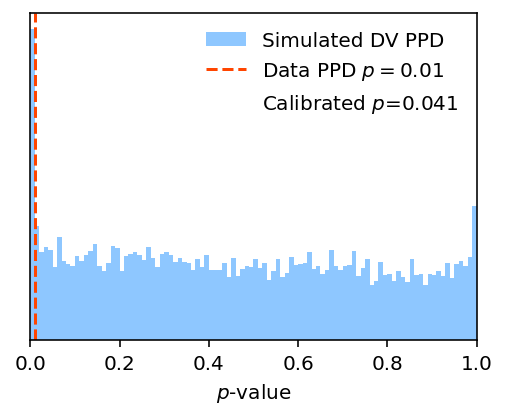

In [38]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'gammat','wtheta'],
    data_sets_dprime=['xip','xim', 'gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


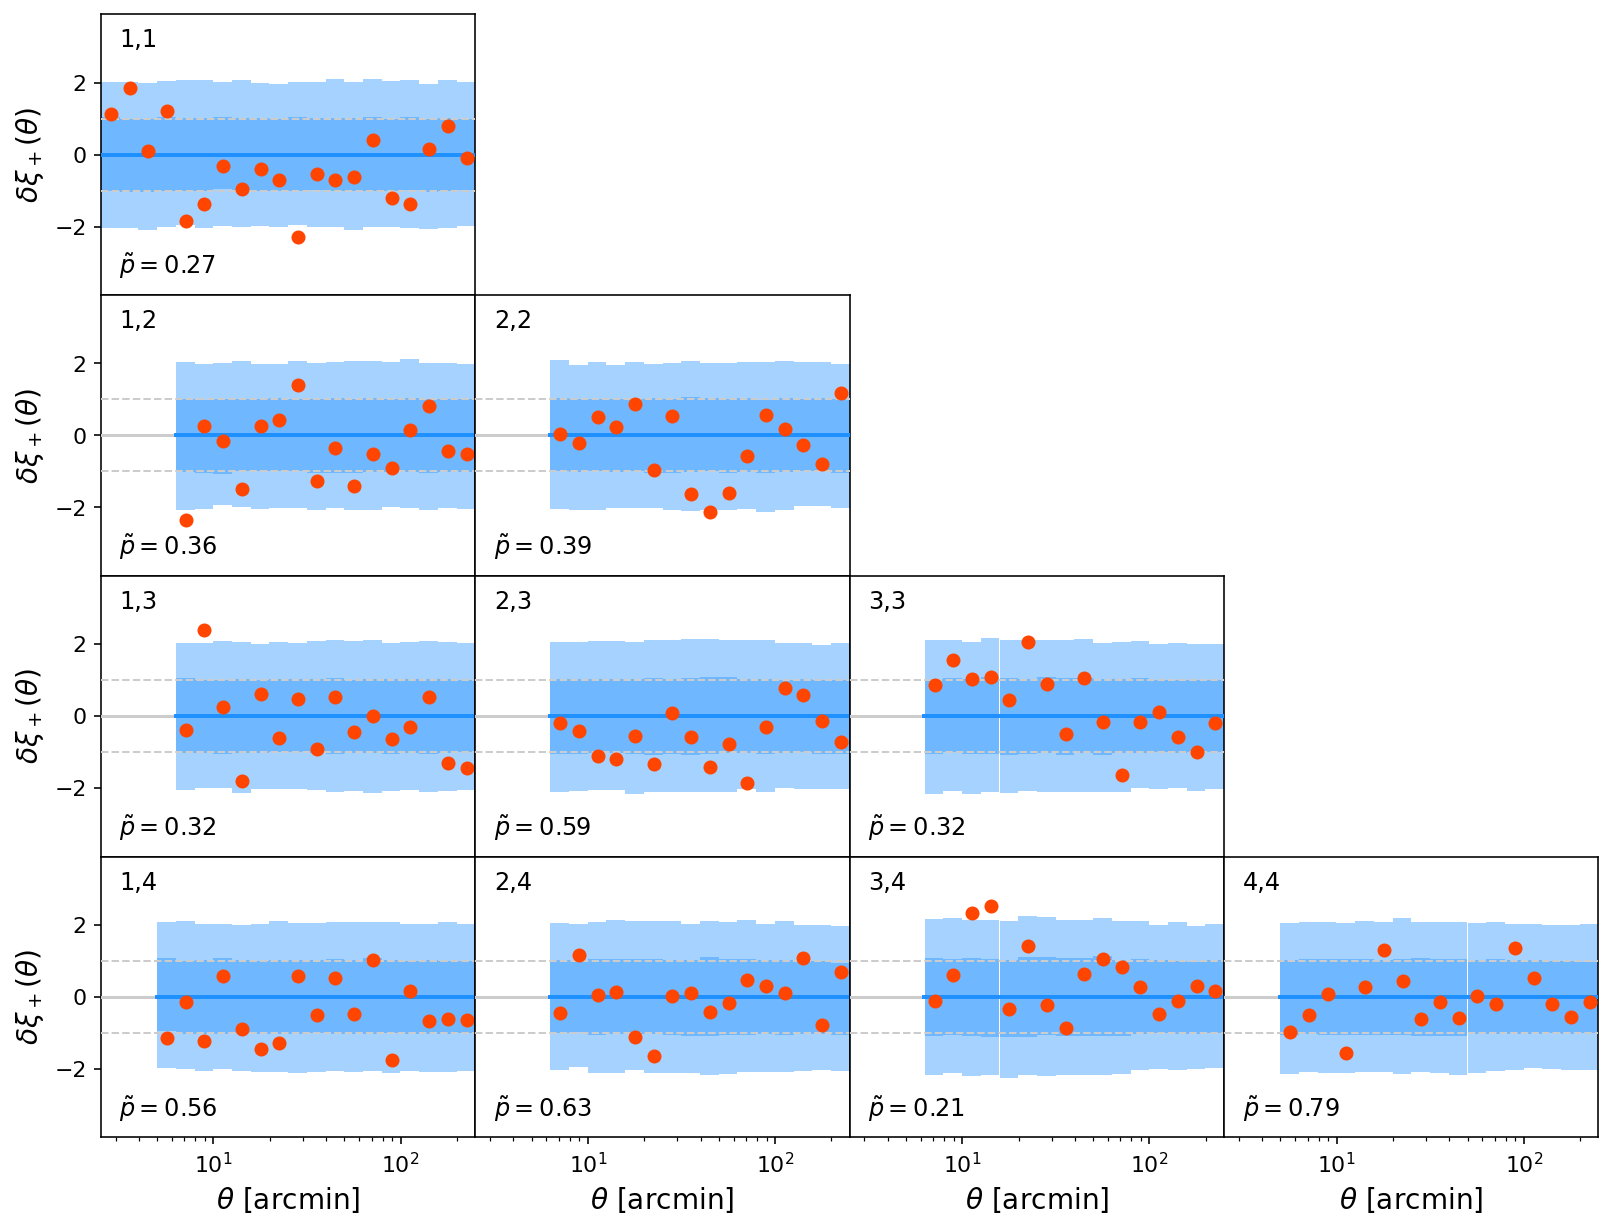

Using DV.fits covariance for chi2


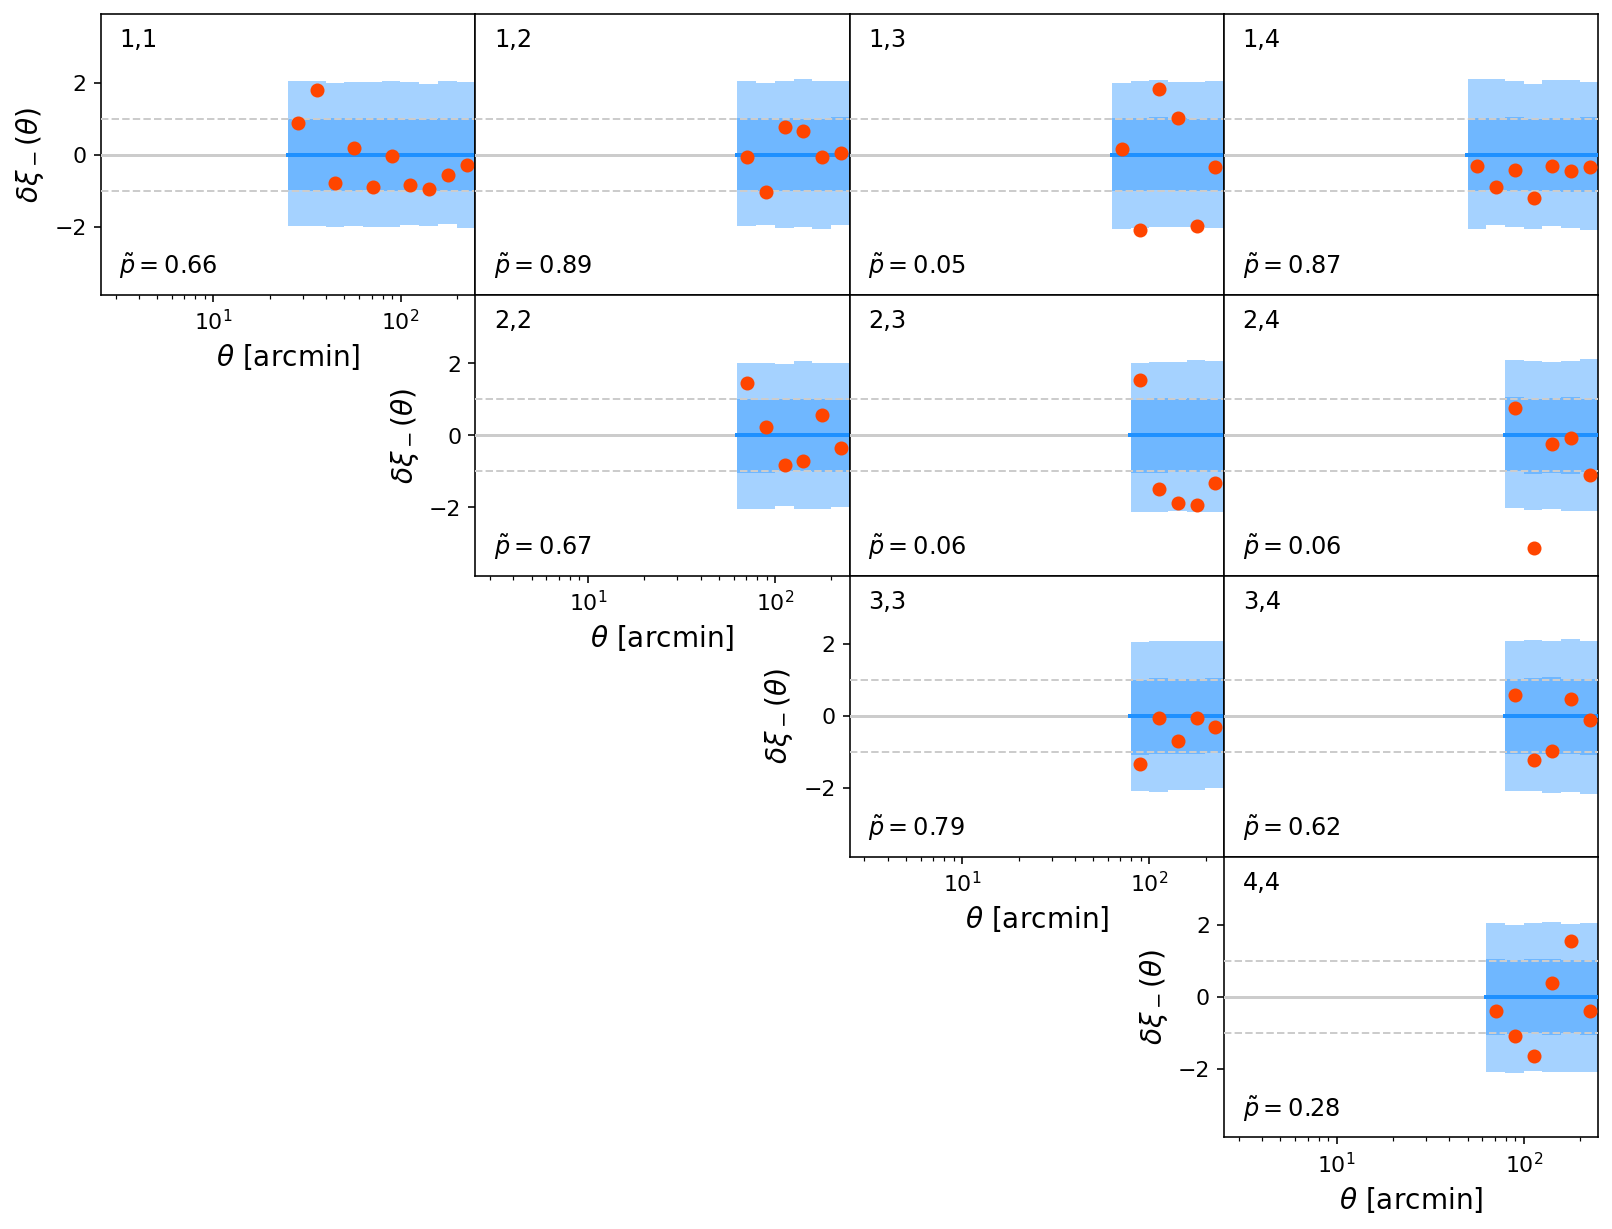

Using DV.fits covariance for chi2


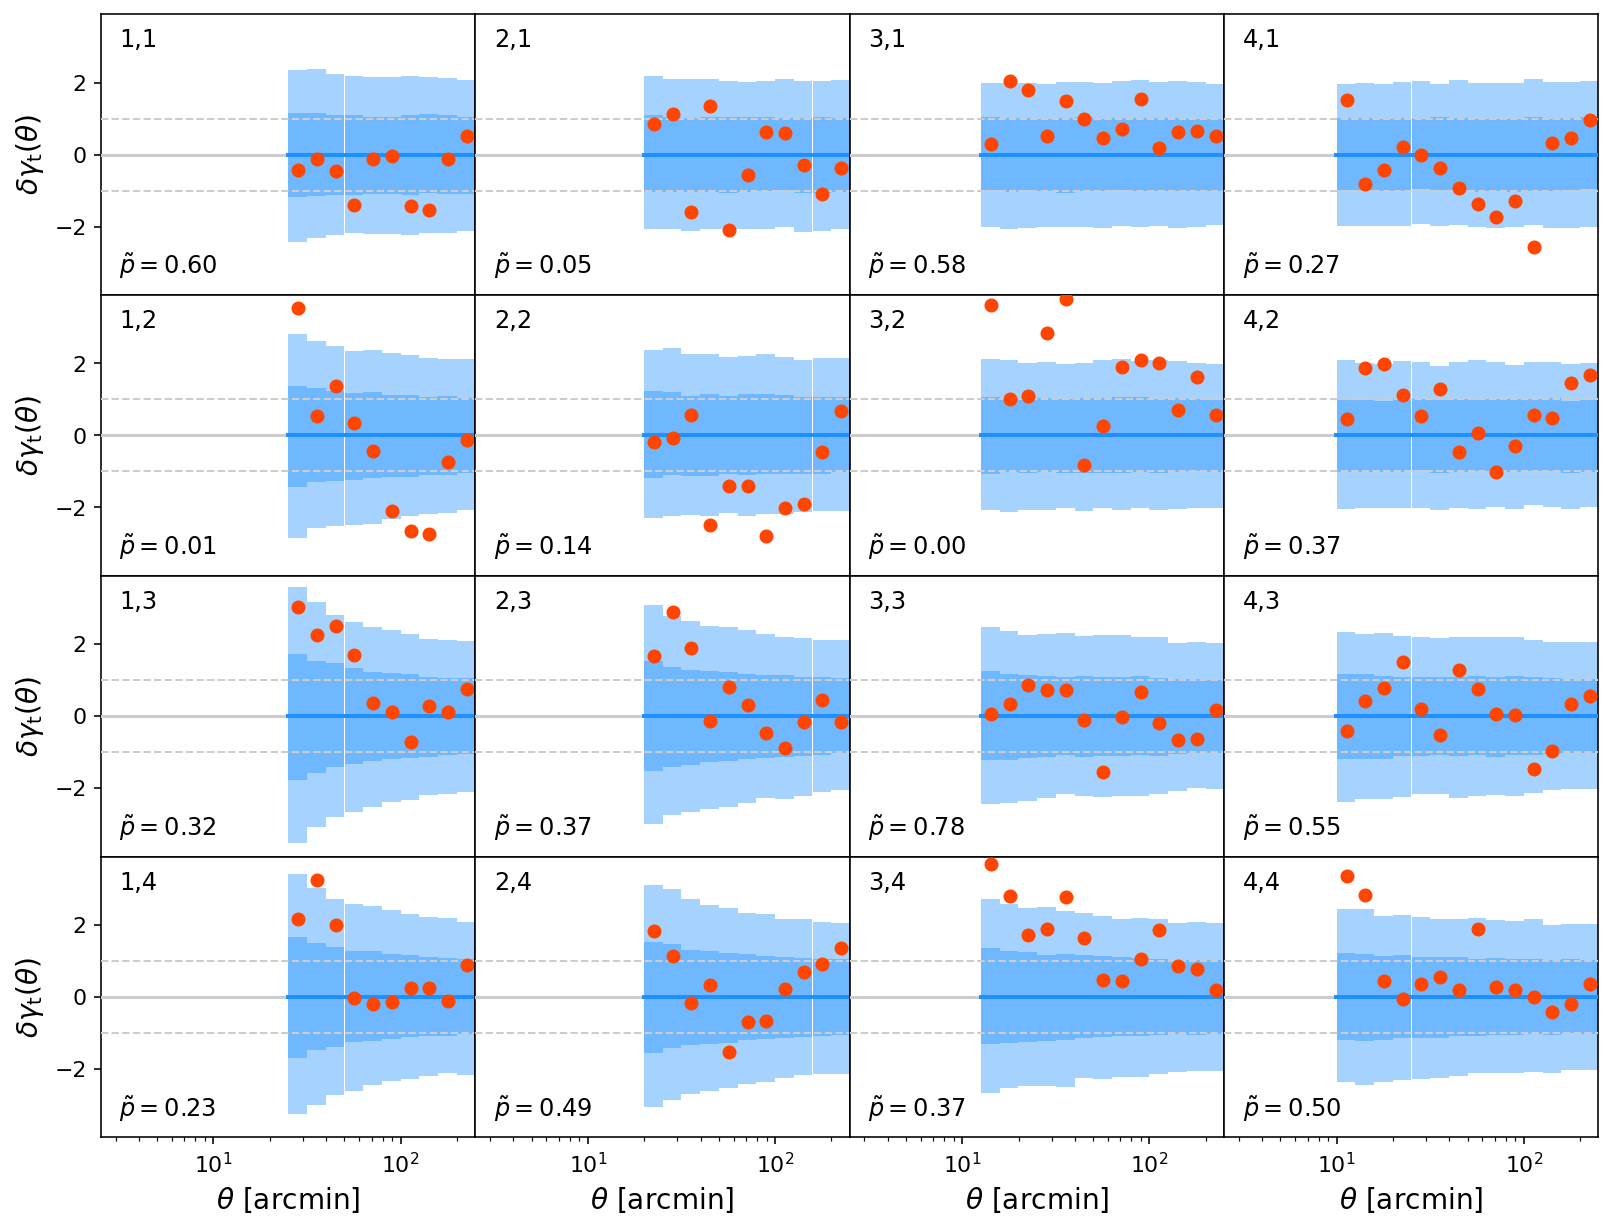

Using DV.fits covariance for chi2


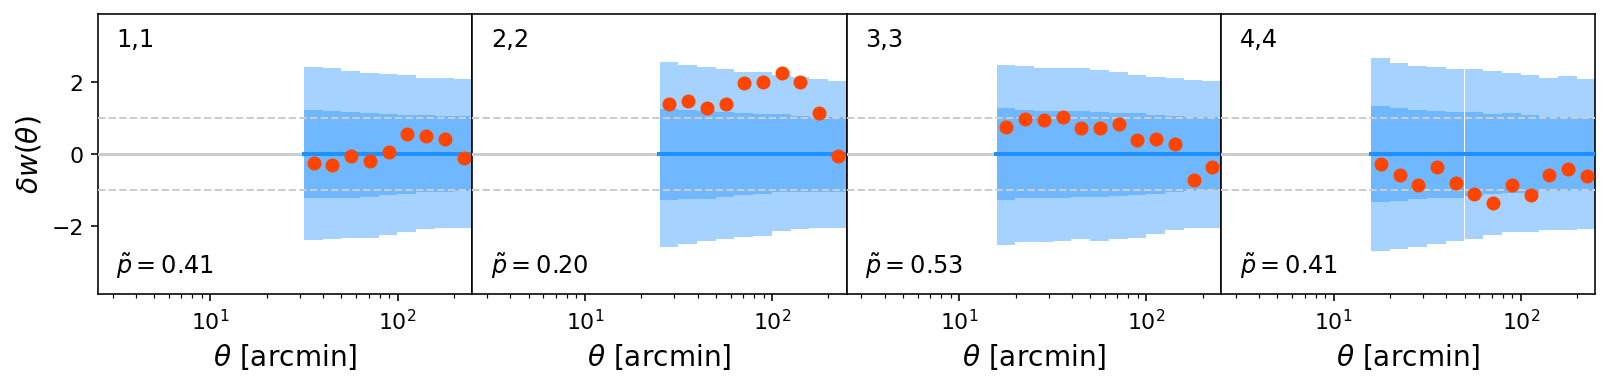

In [39]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


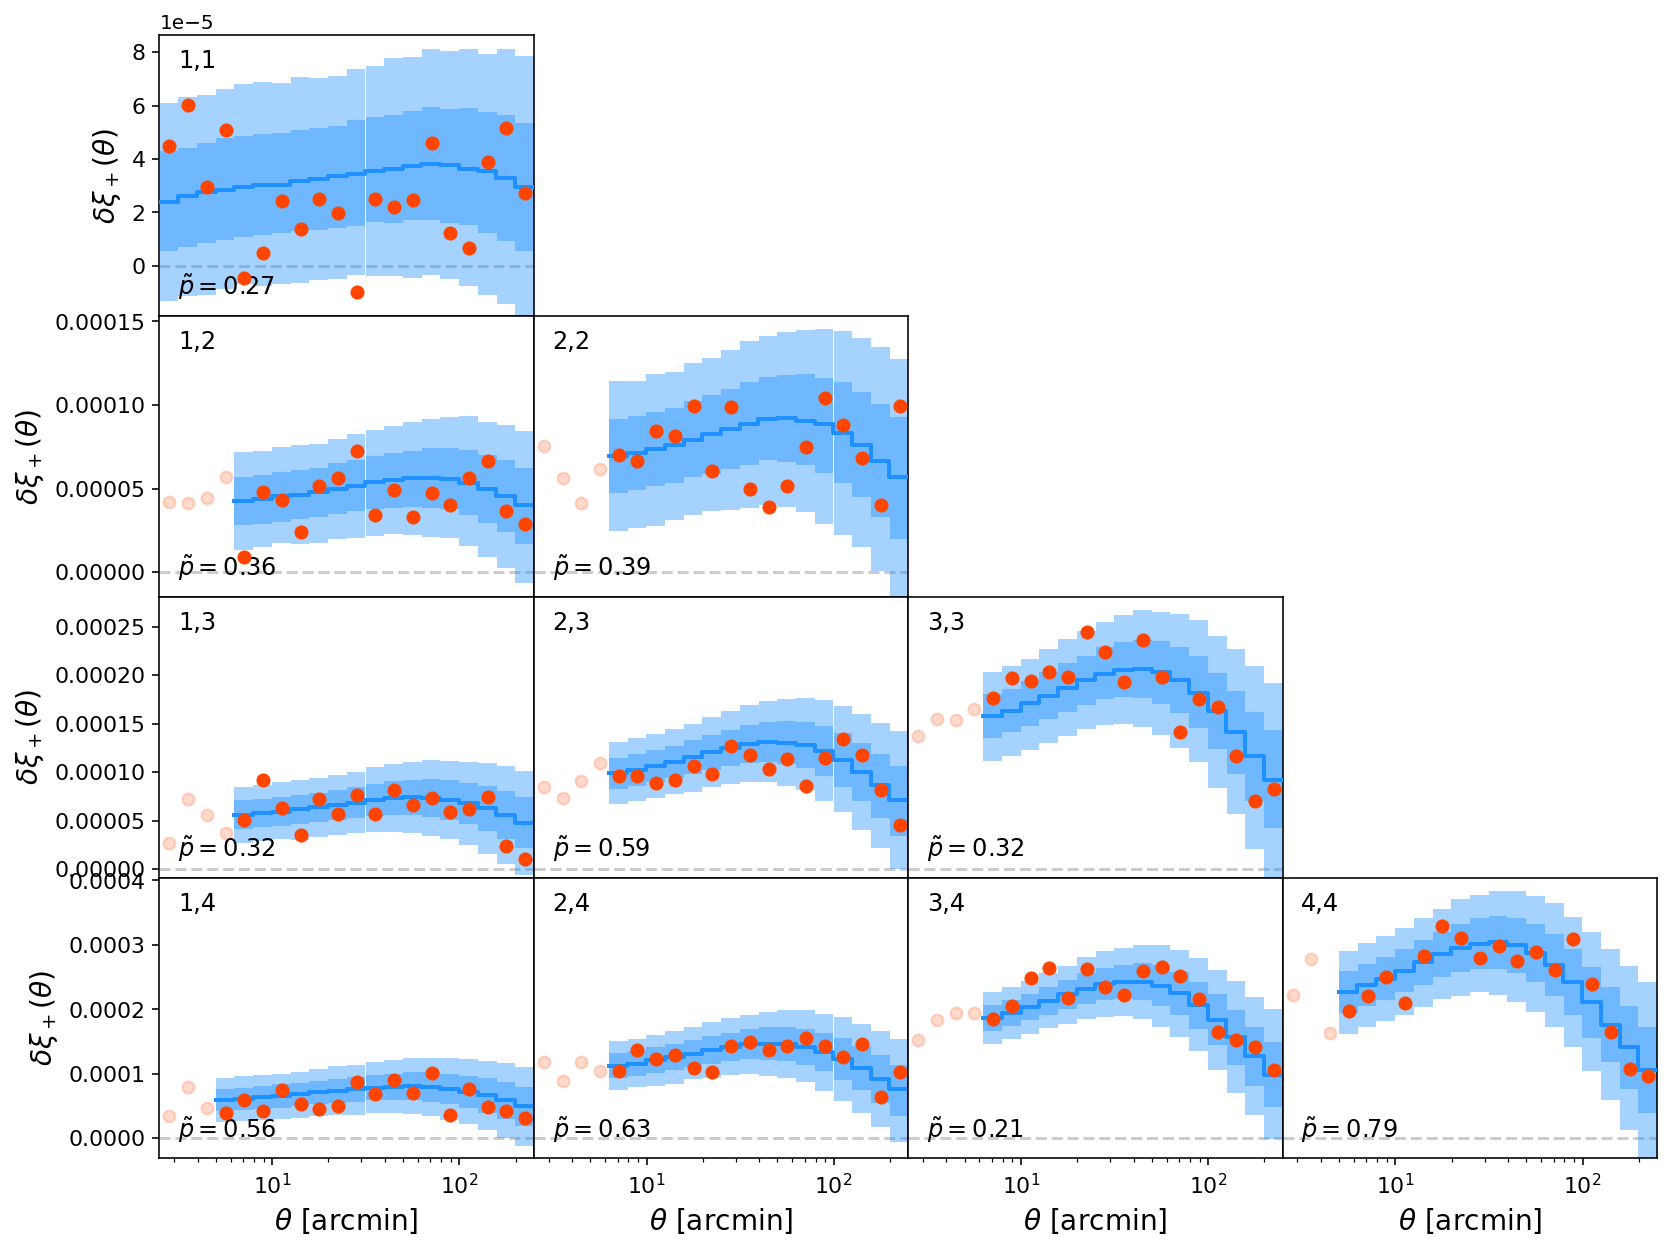

Using DV.fits covariance for chi2


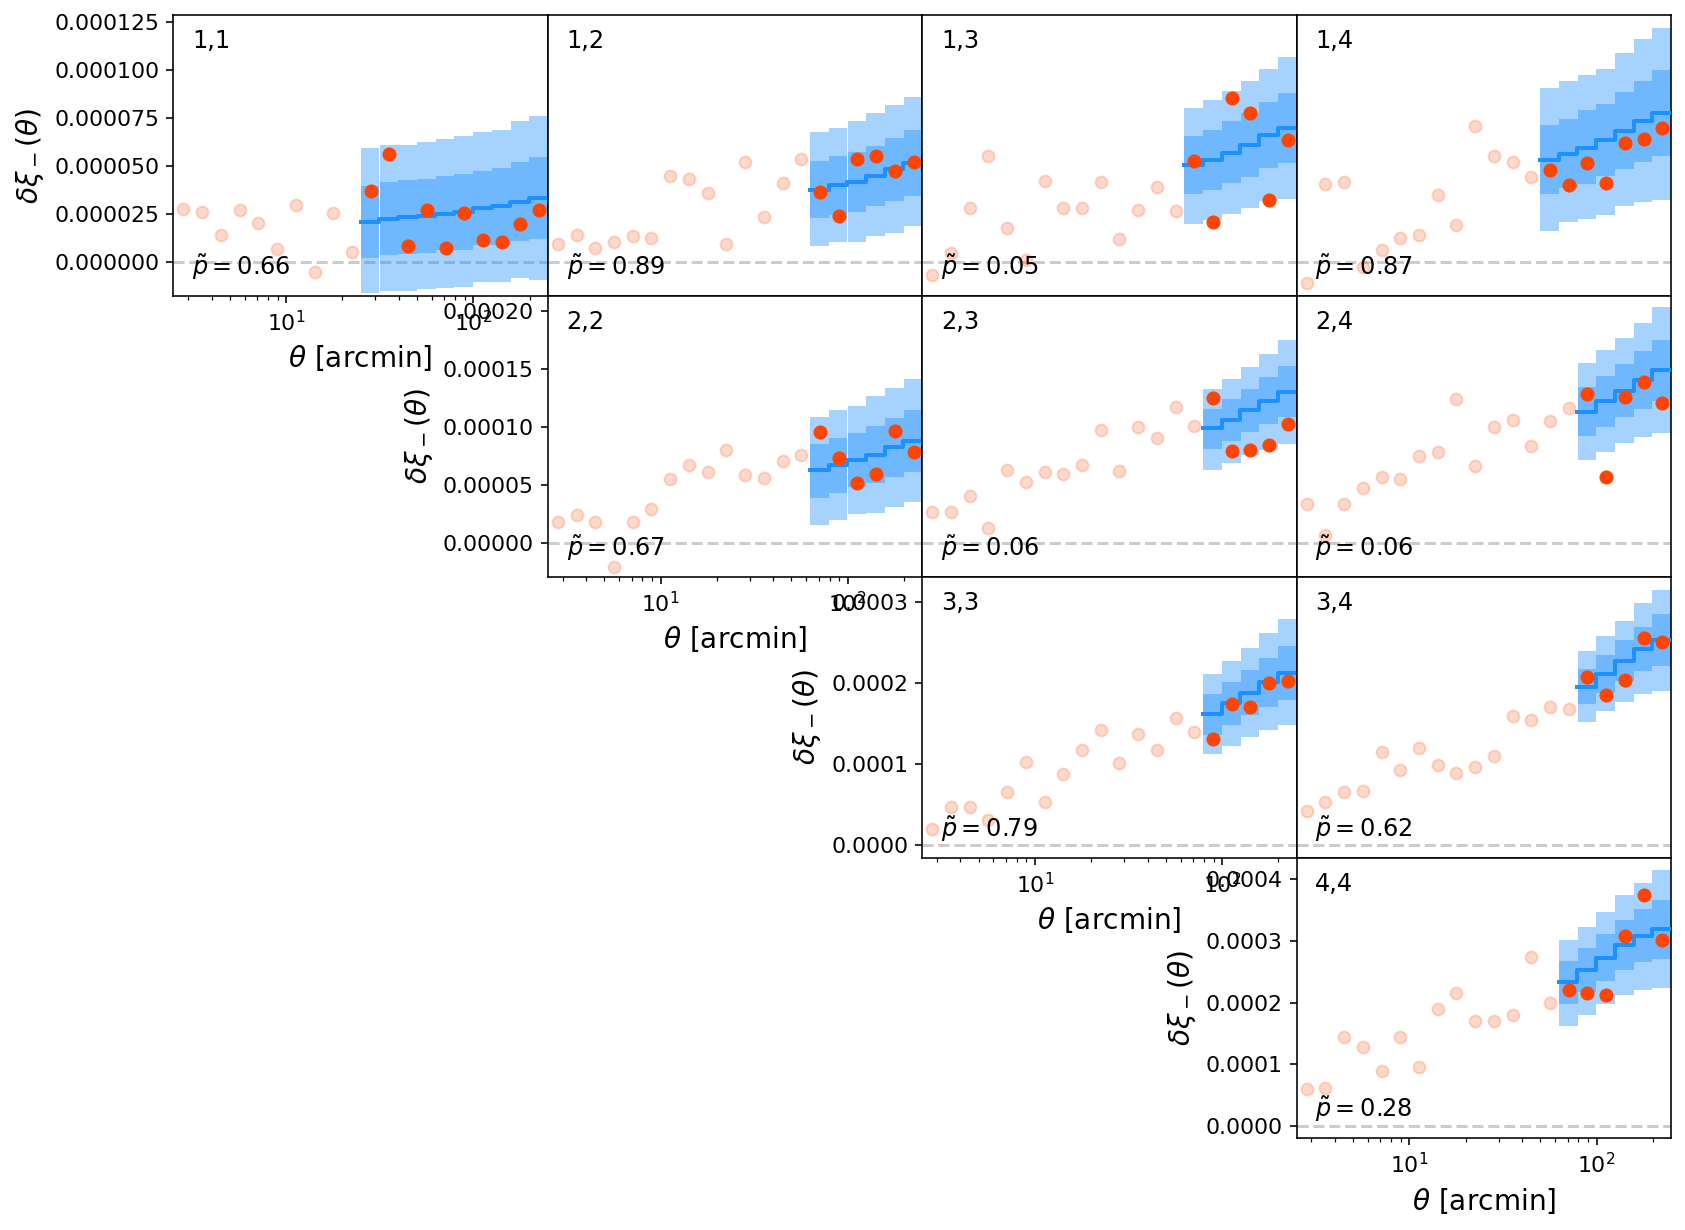

Using DV.fits covariance for chi2


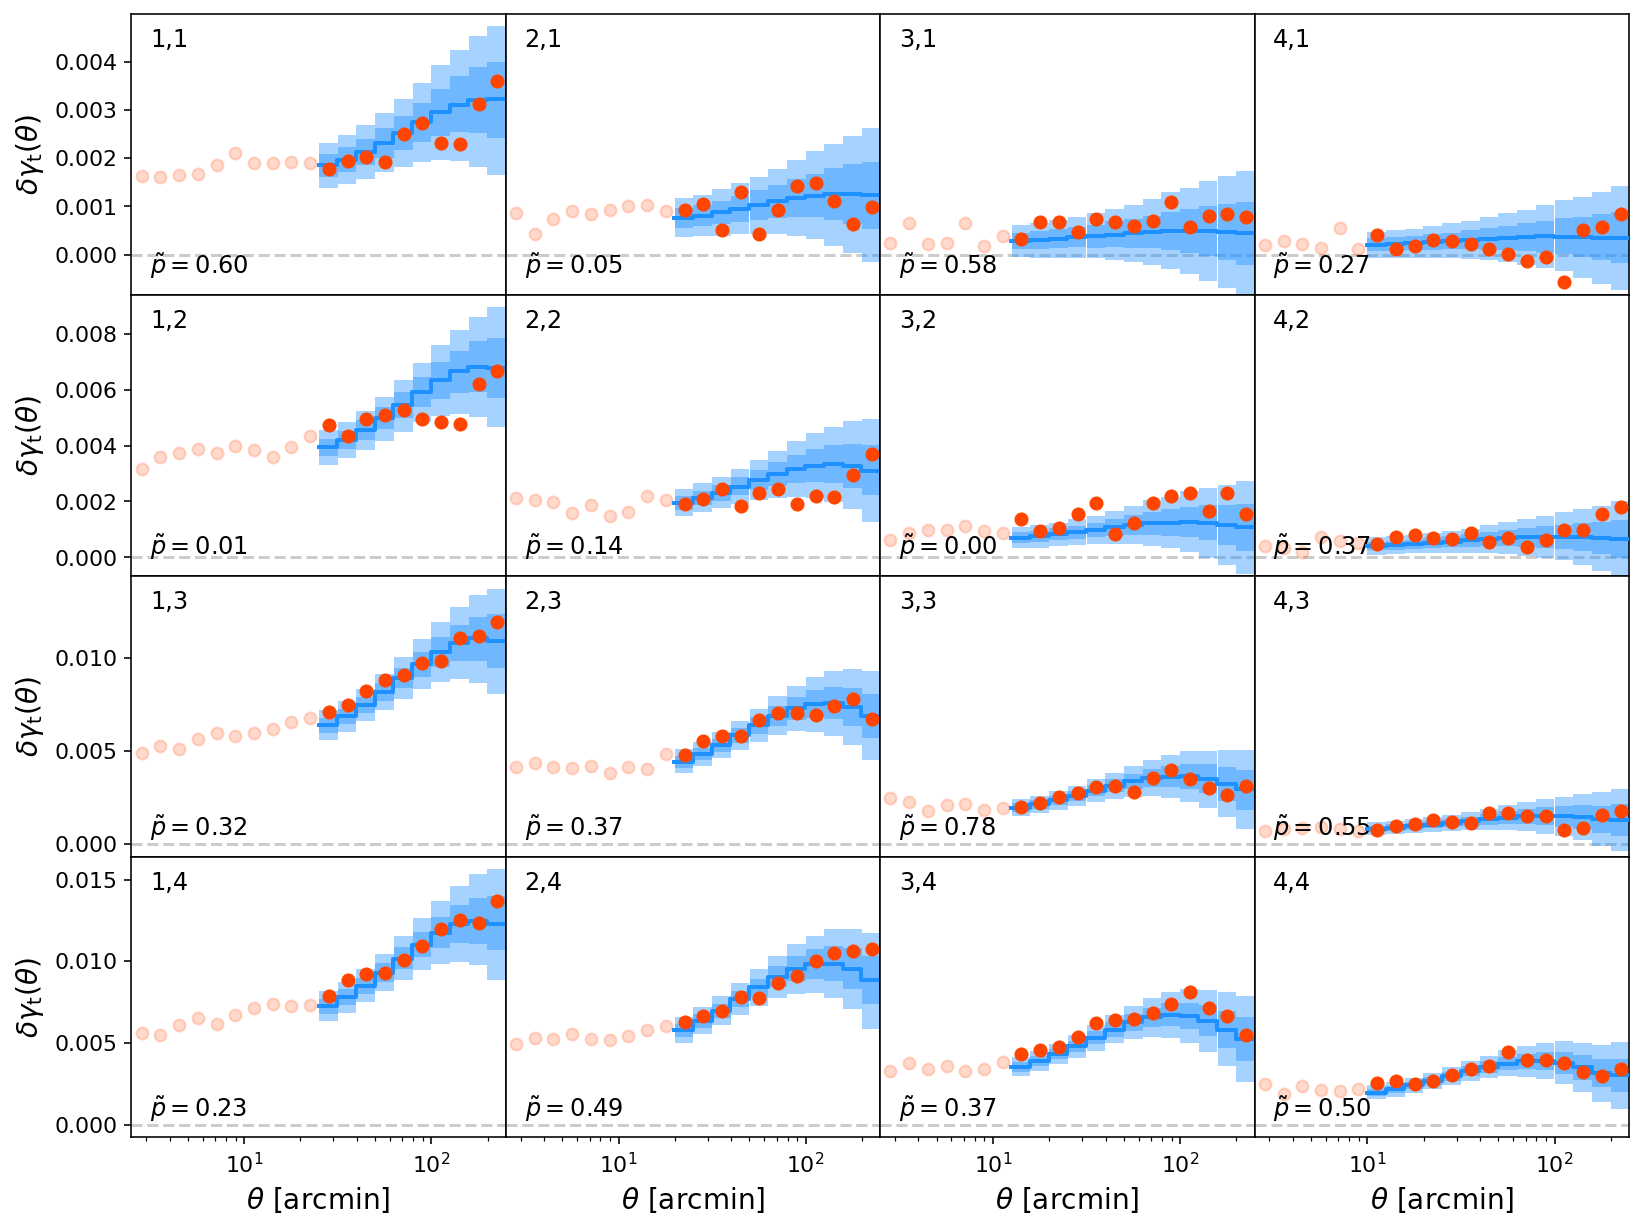

Using DV.fits covariance for chi2


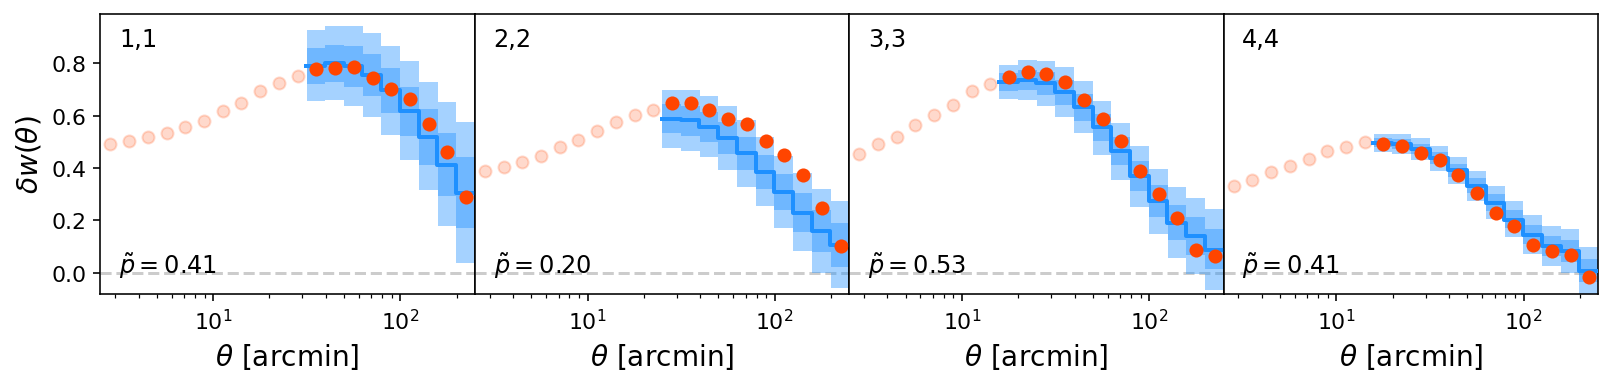

In [40]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 2x2 goodness of fit

In [6]:
RUN_NAME = '2x2pt_lcdm_SR_maglim'
RUN_NAME_PPD = 'maglim_2x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2pt_lcdm_SR_maglim.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2pt_lcdm_SR_maglim.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5),

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, F))
  return np.dot(A,B)



###############################
## Compute IS weights for d ###
###############################
(22408, 10000)
Neff = 28.1 (median), 16th=15.7, 84th=53.5 (0 were nan's)

###############################
## Computing p-values #########
###############################
2x2
Appending pval for 2x2 0.003488516379370641
gammat
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.106591988118127e-12
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.106591988118127e-12
Some (4) eigenvalues are non-positive. Clipping to minimum positive one = 2.106591988118127e-12
Appending pval for gammat 0.018842610239982346
wtheta
Appending pval for wtheta 0.32781592744090526

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0209 (raw pval=0.0034)
     - 2x2          calibrated pval=0.0210 (raw pval=0.0035)
     - gammat       calibrated pval=0.7088 (raw pval=0.0188)
     - wth

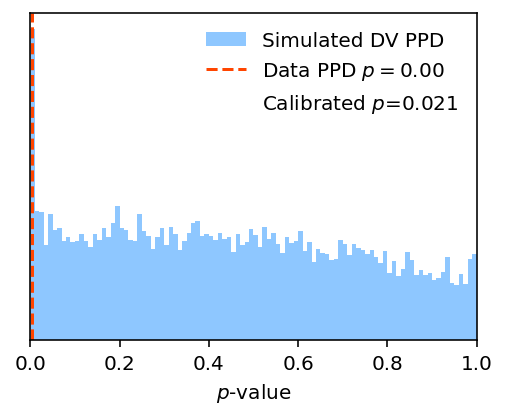

In [7]:
pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['gammat','wtheta'],
    data_sets_dprime=['gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    #pvals_subsets=res[0],
    pvals_subsets=pvals_subsets,
    get_zbin_pair_pcal=False,
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)

)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


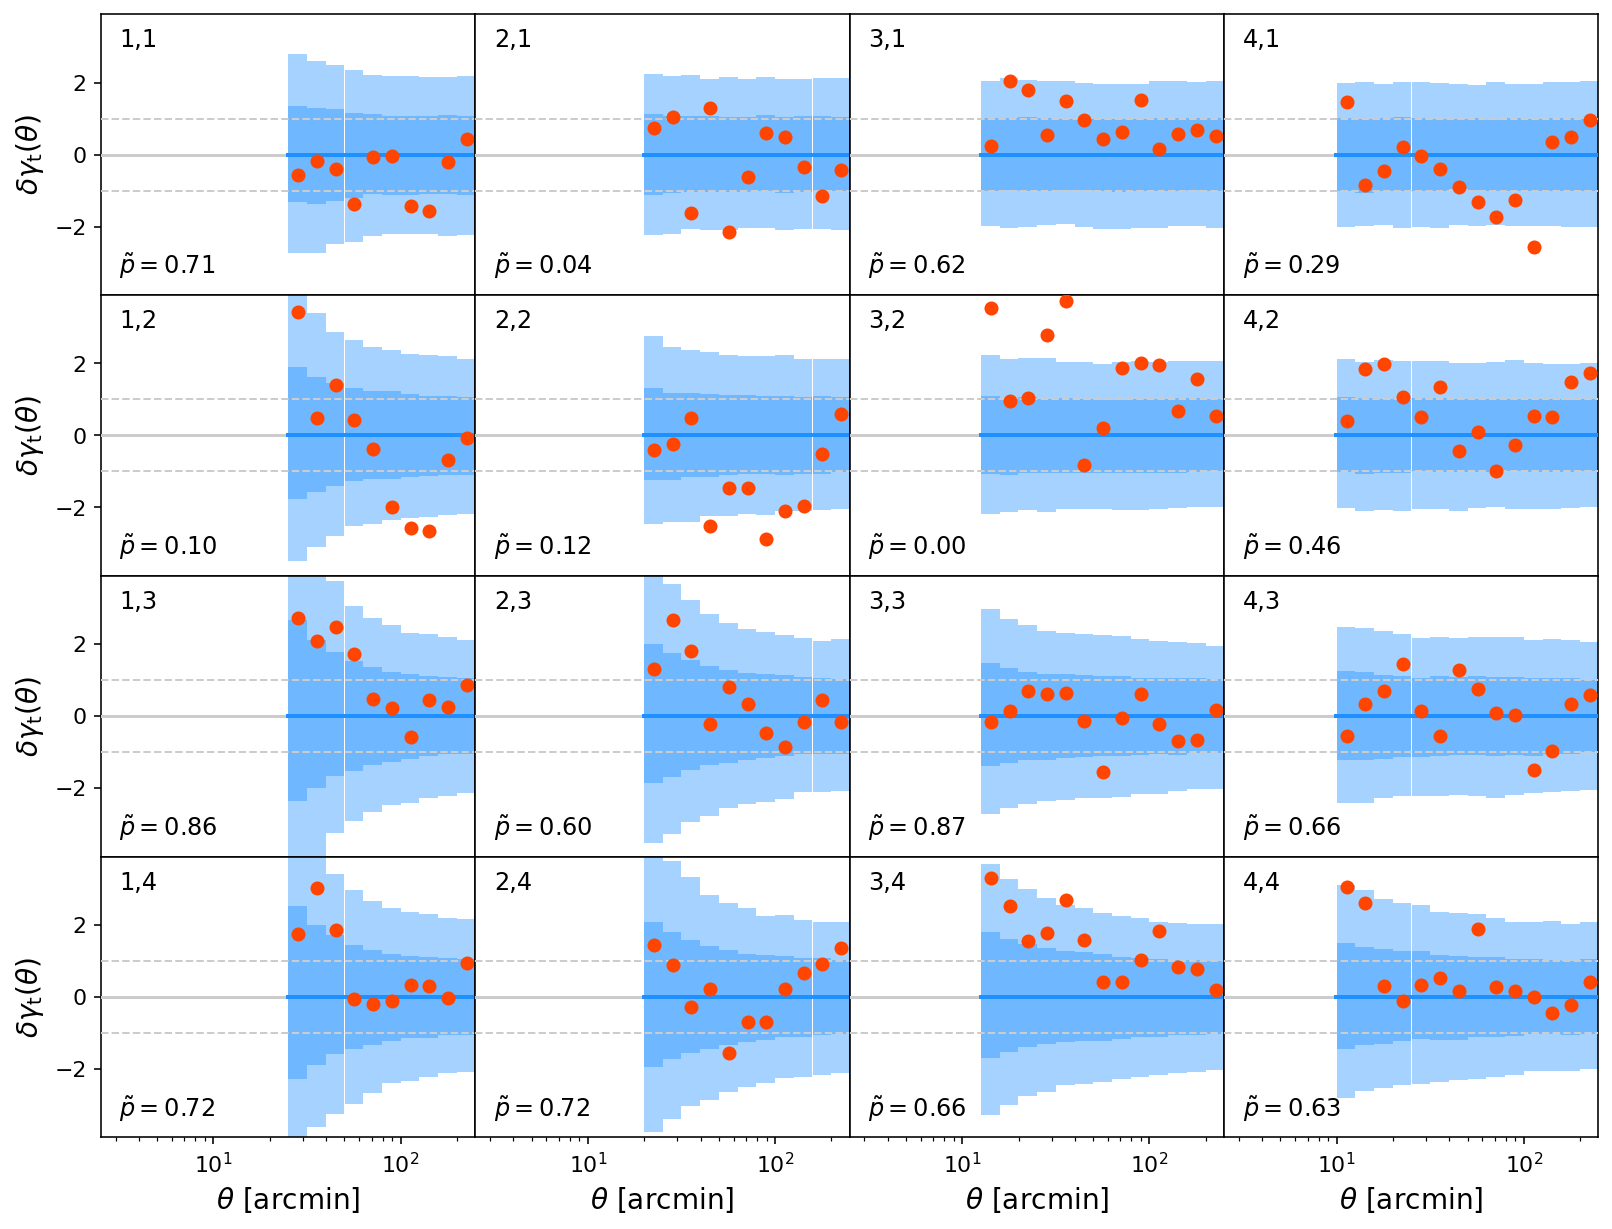

Using DV.fits covariance for chi2


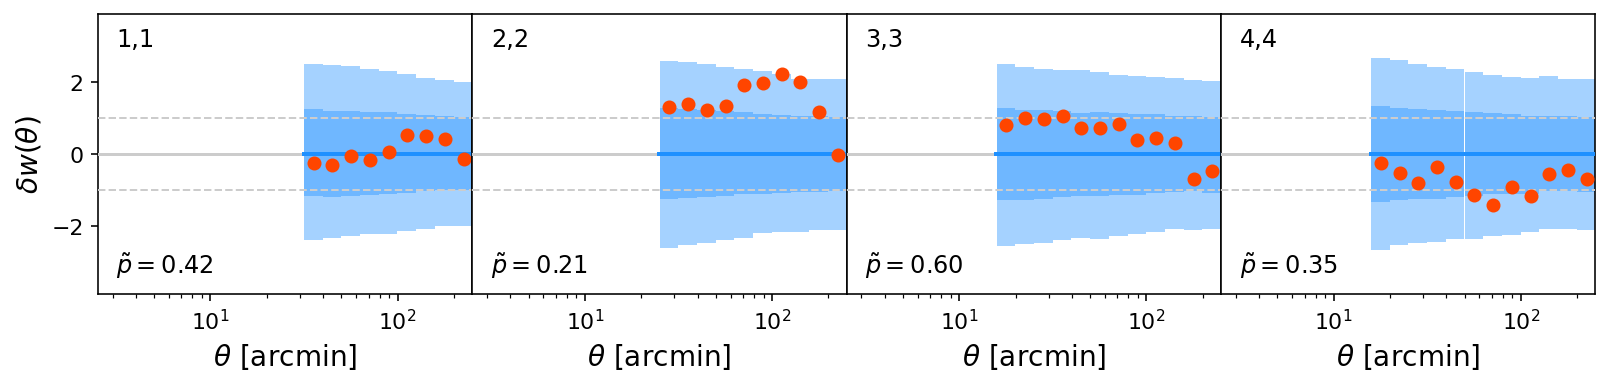

In [44]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


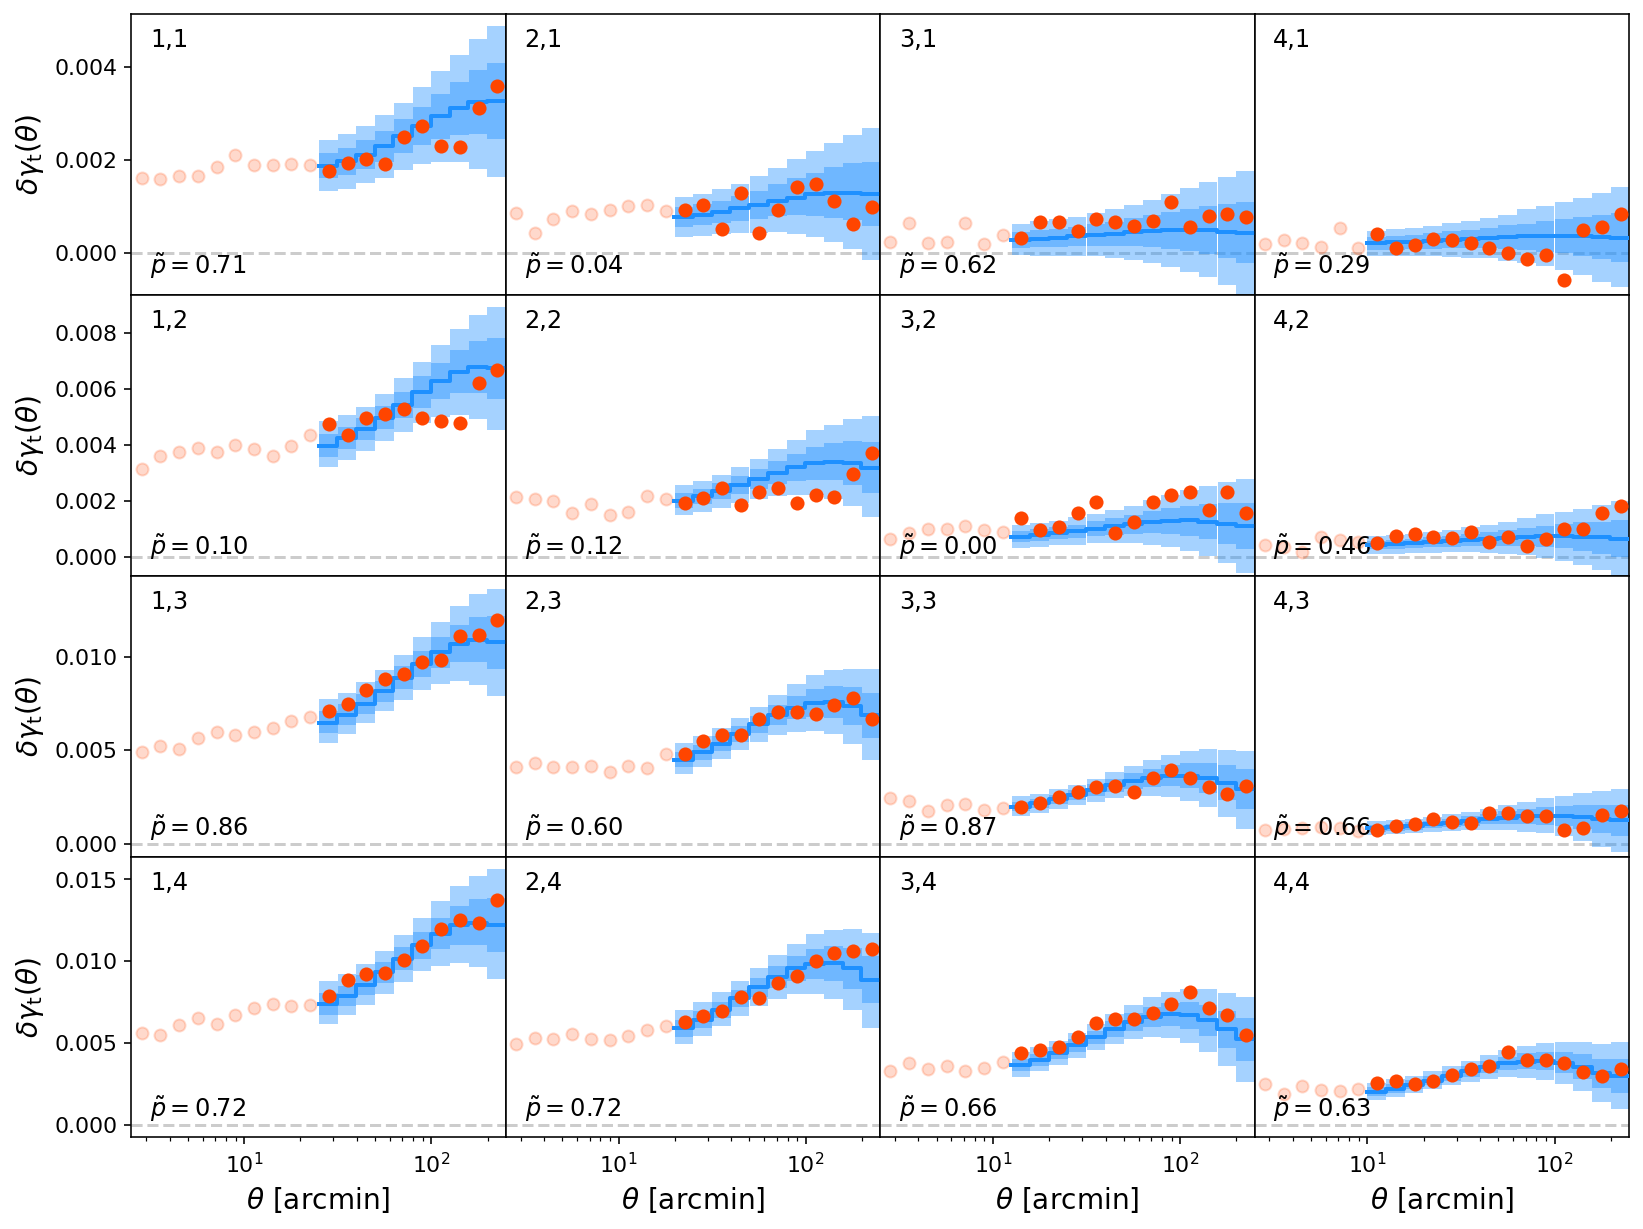

Using DV.fits covariance for chi2


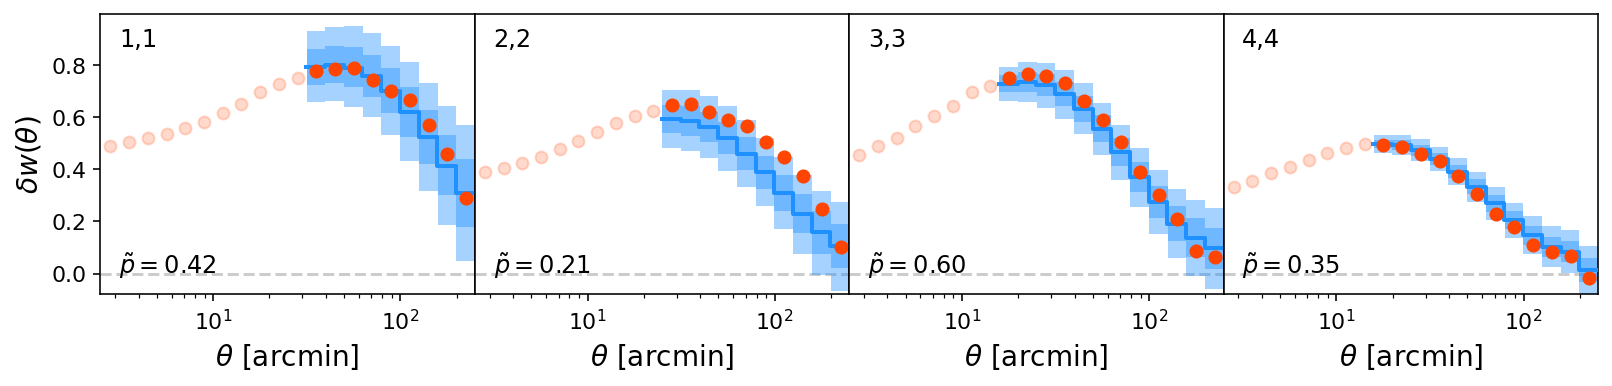

In [45]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 1x2 goodness of fit

In [46]:
RUN_NAME = '1x2pt_lcdm_SR_maglim'
RUN_NAME_PPD = 'maglim_1x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_1x2pt_lcdm_SR_maglim.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_1x2pt_lcdm_SR_maglim.txt
Loading list chain at
../maglim_1x2_goodnessoffit/ppd_chain_1x2pt_lcdm_SR_maglim_maglim_1x2_goodnessoffit.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (

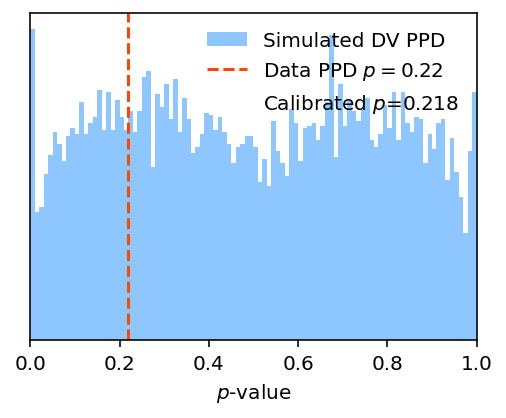

In [47]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


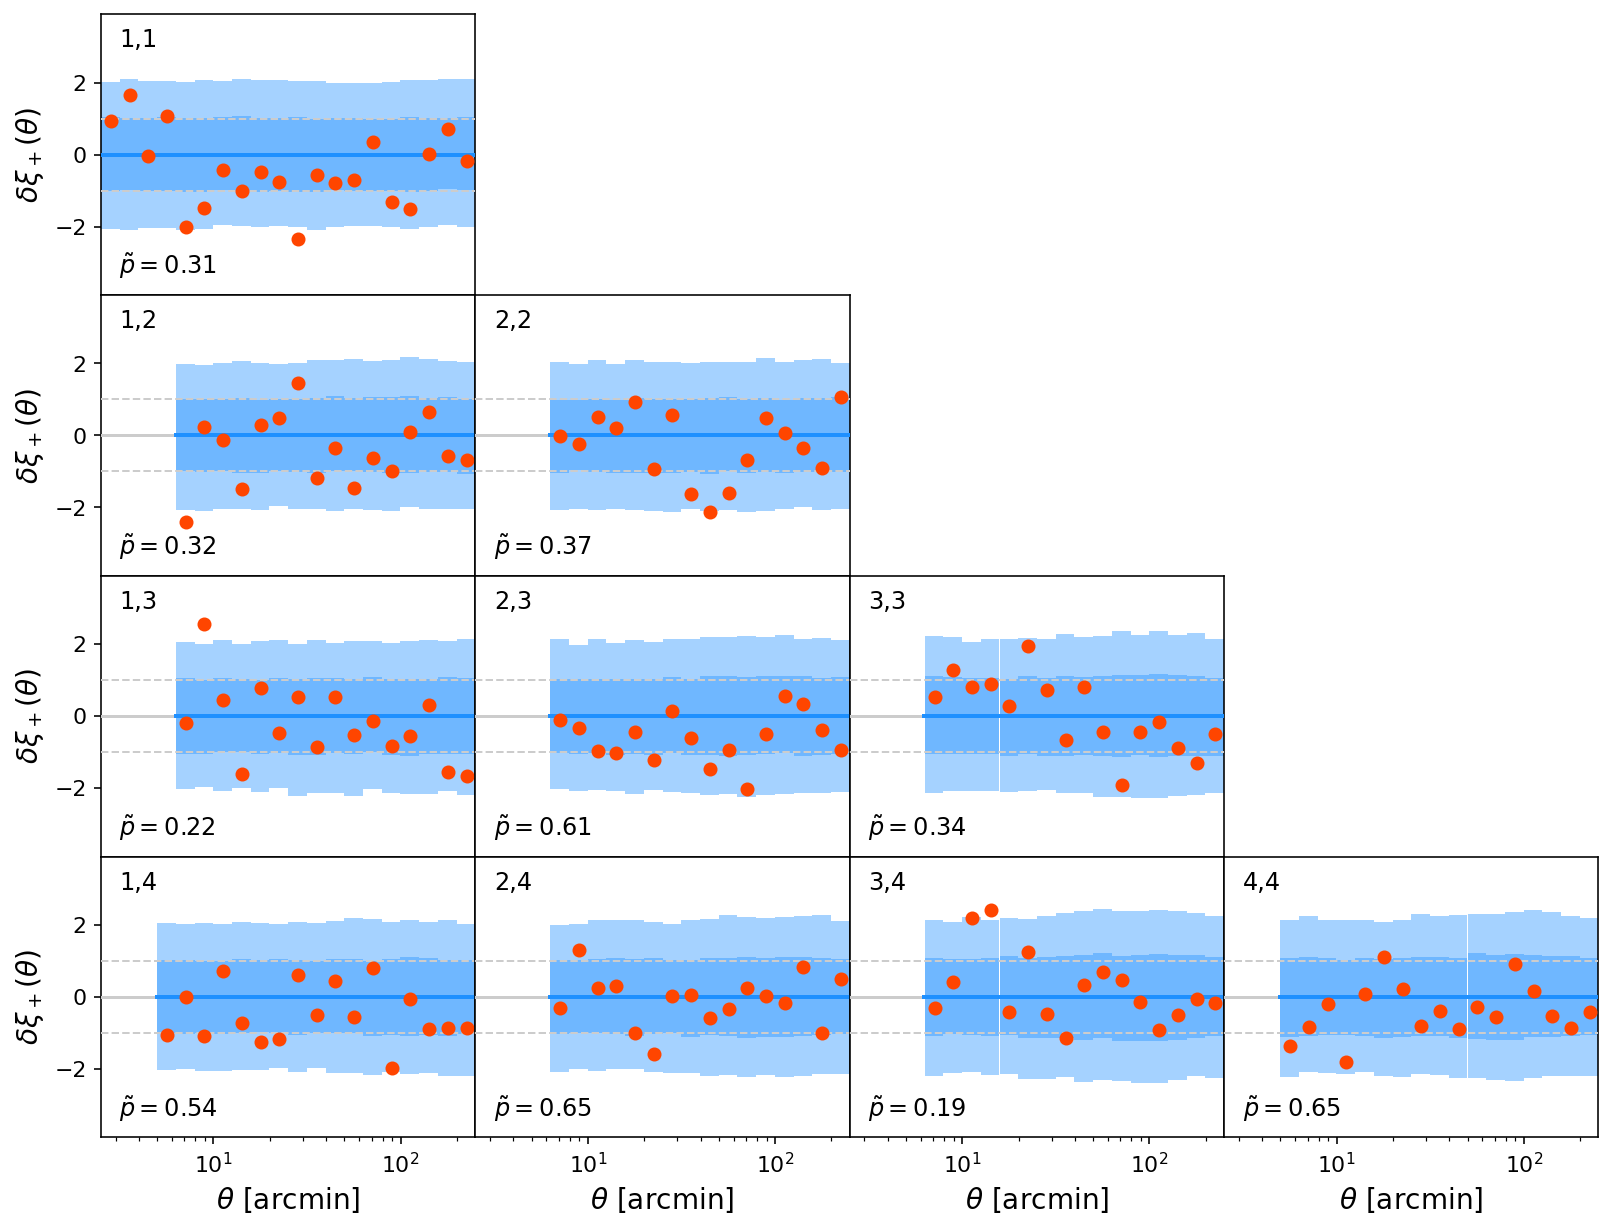

Using DV.fits covariance for chi2


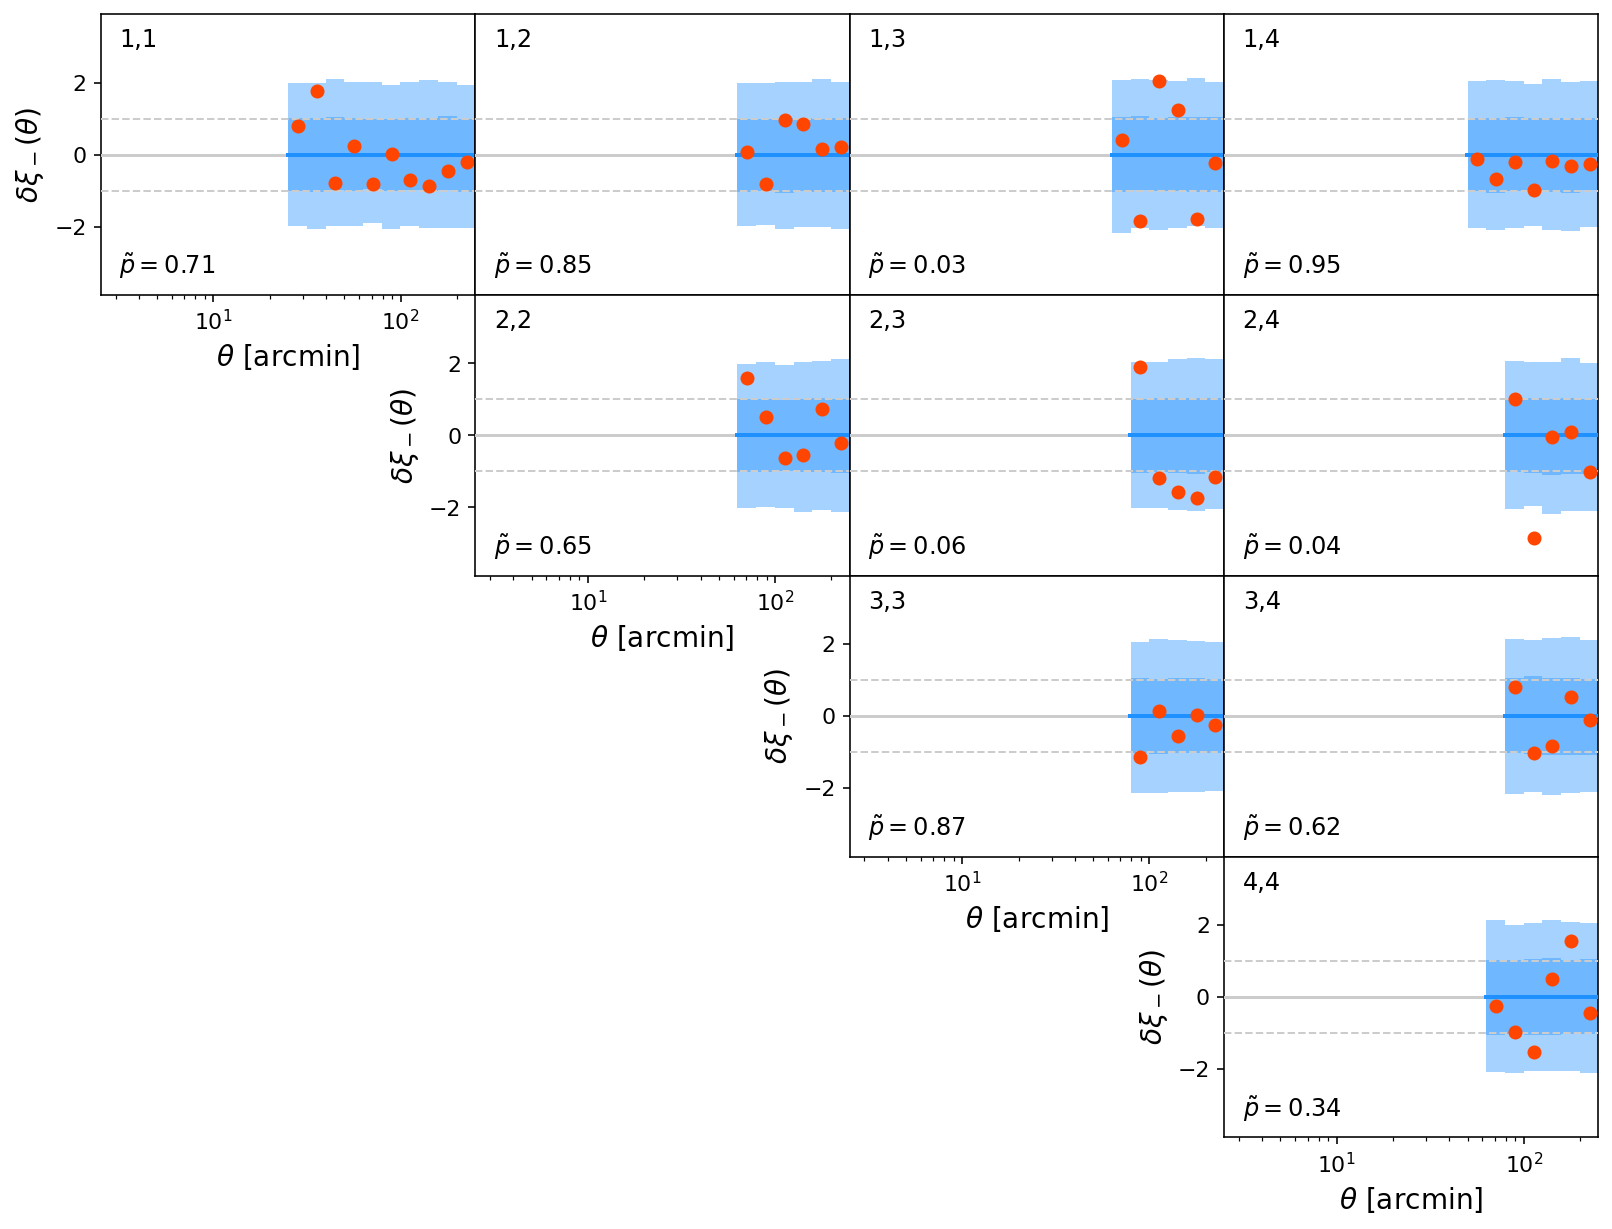

In [48]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


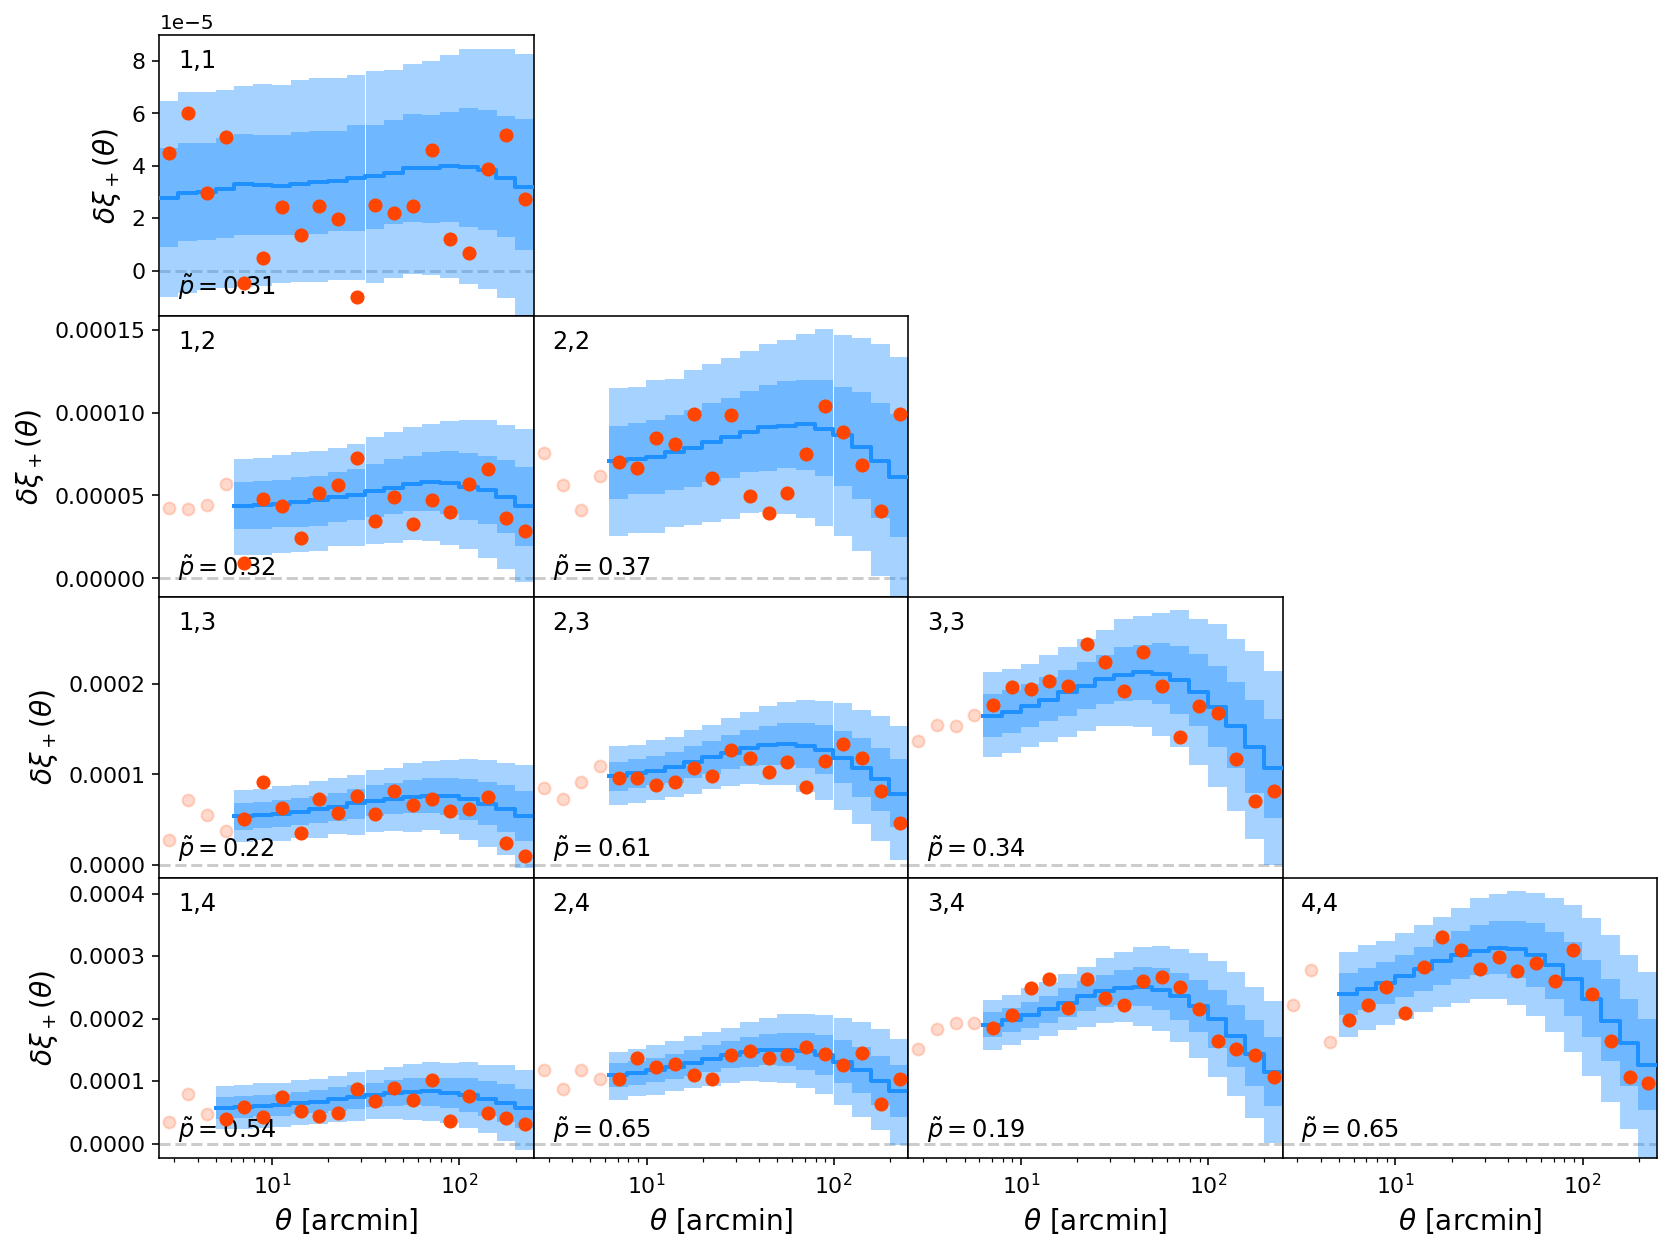

Using DV.fits covariance for chi2


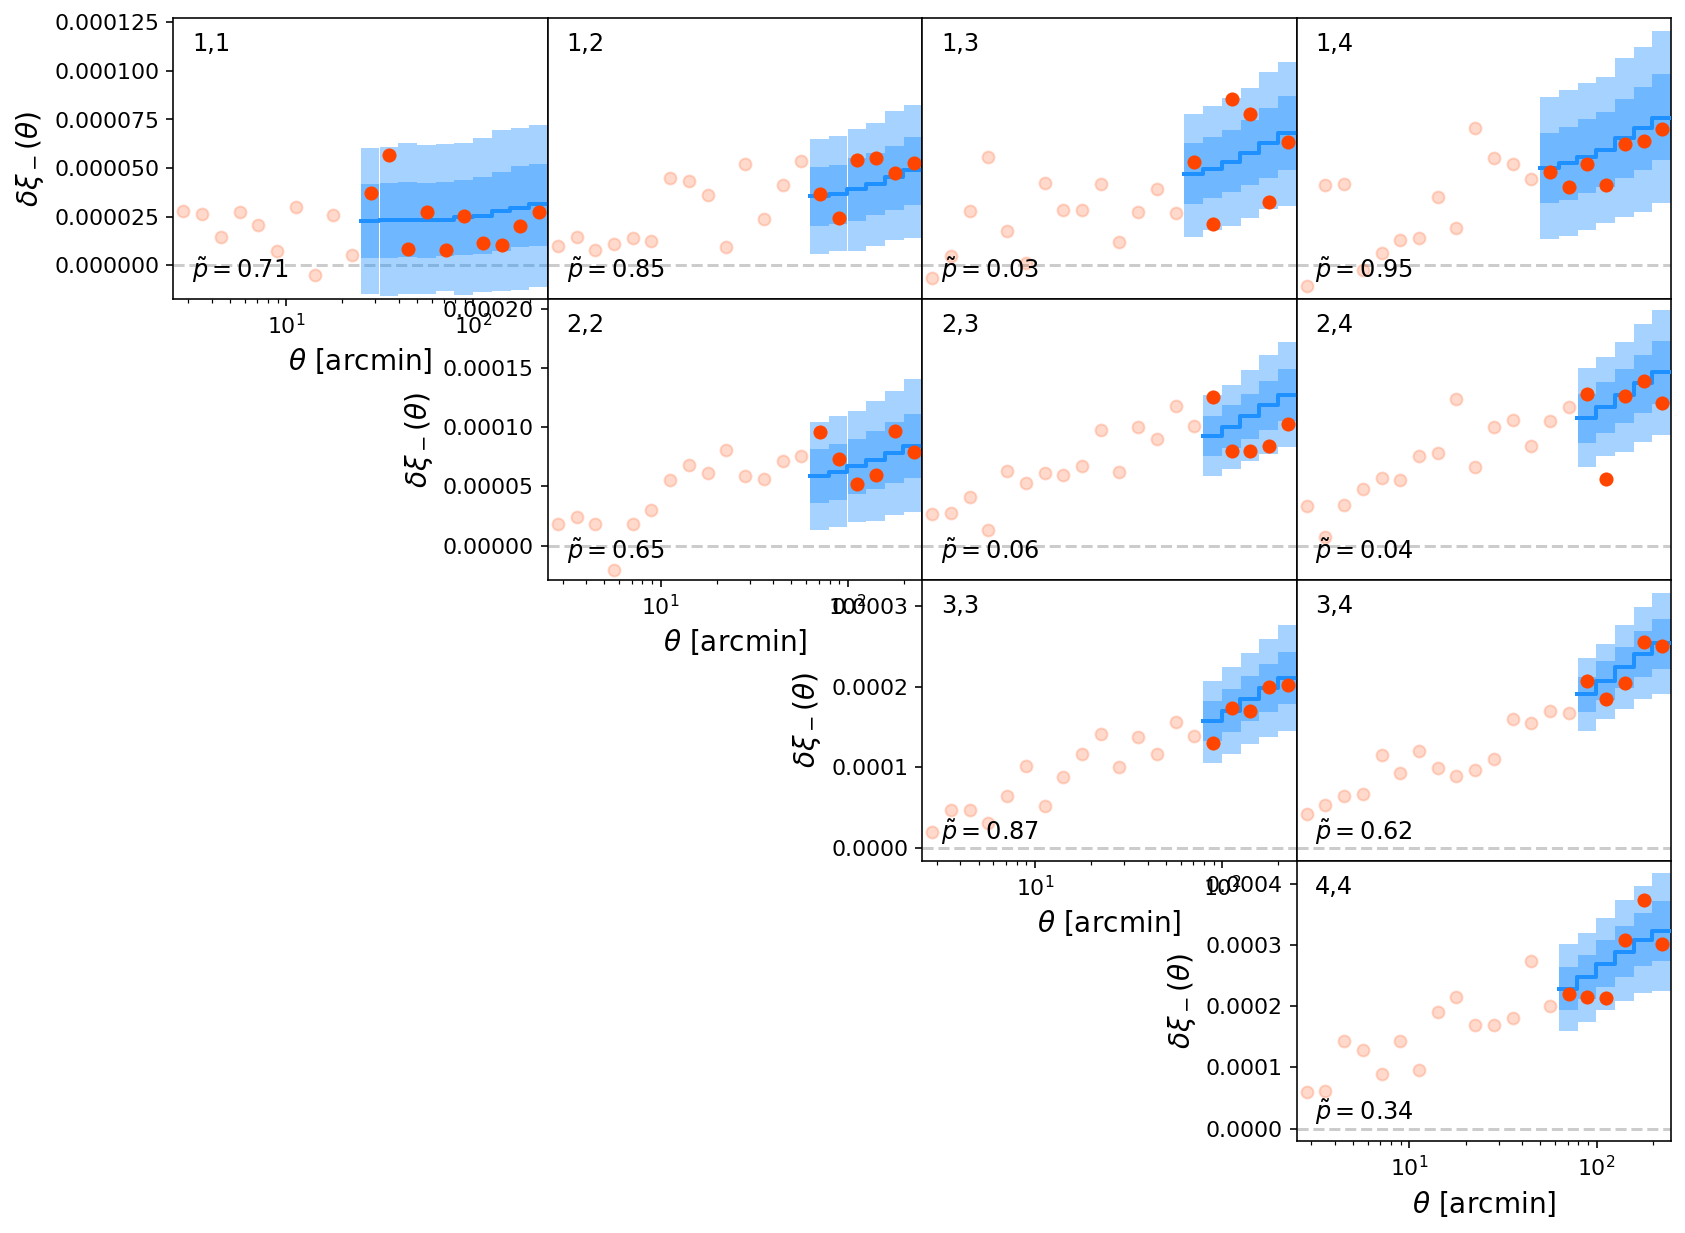

In [49]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 1x2 vs 2x2

In [50]:
RUN_NAME = '2x2pt_lcdm_SR_maglim'
RUN_NAME_PPD = 'maglim_1x2_vs_2x2'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2pt_lcdm_SR_maglim.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2pt_lcdm_SR_maglim.txt
Loading list chain at
../maglim_1x2_vs_2x2/ppd_chain_2x2pt_lcdm_SR_maglim_maglim_1x2_vs_2x2.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2),

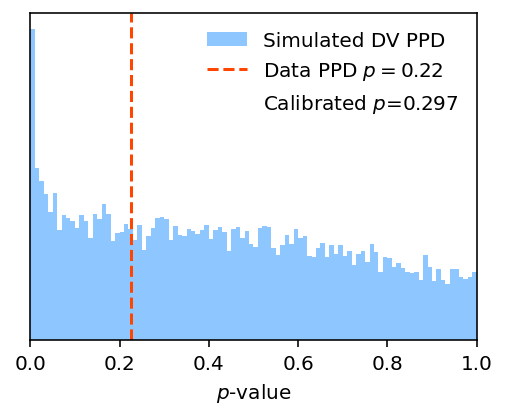

In [51]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['gammat', 'wtheta'],
    data_sets_dprime=['xip','xim'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


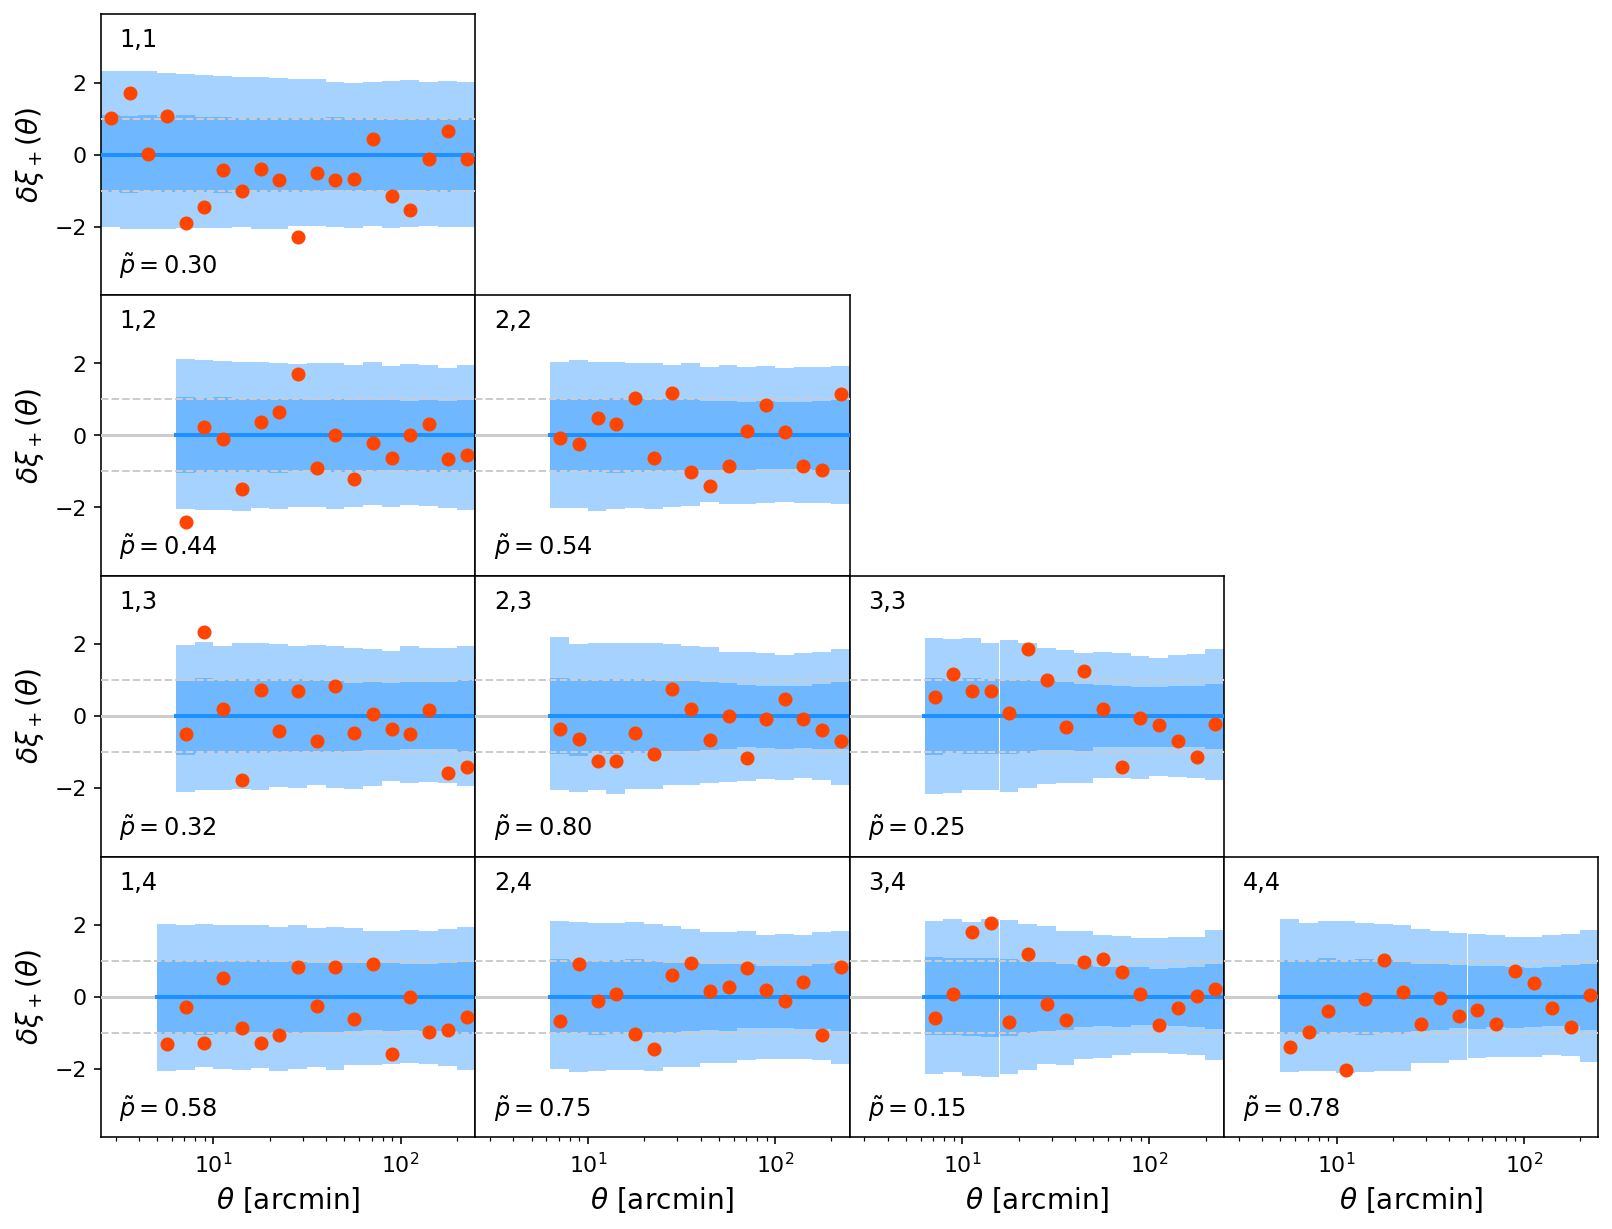

Using DV.fits covariance for chi2


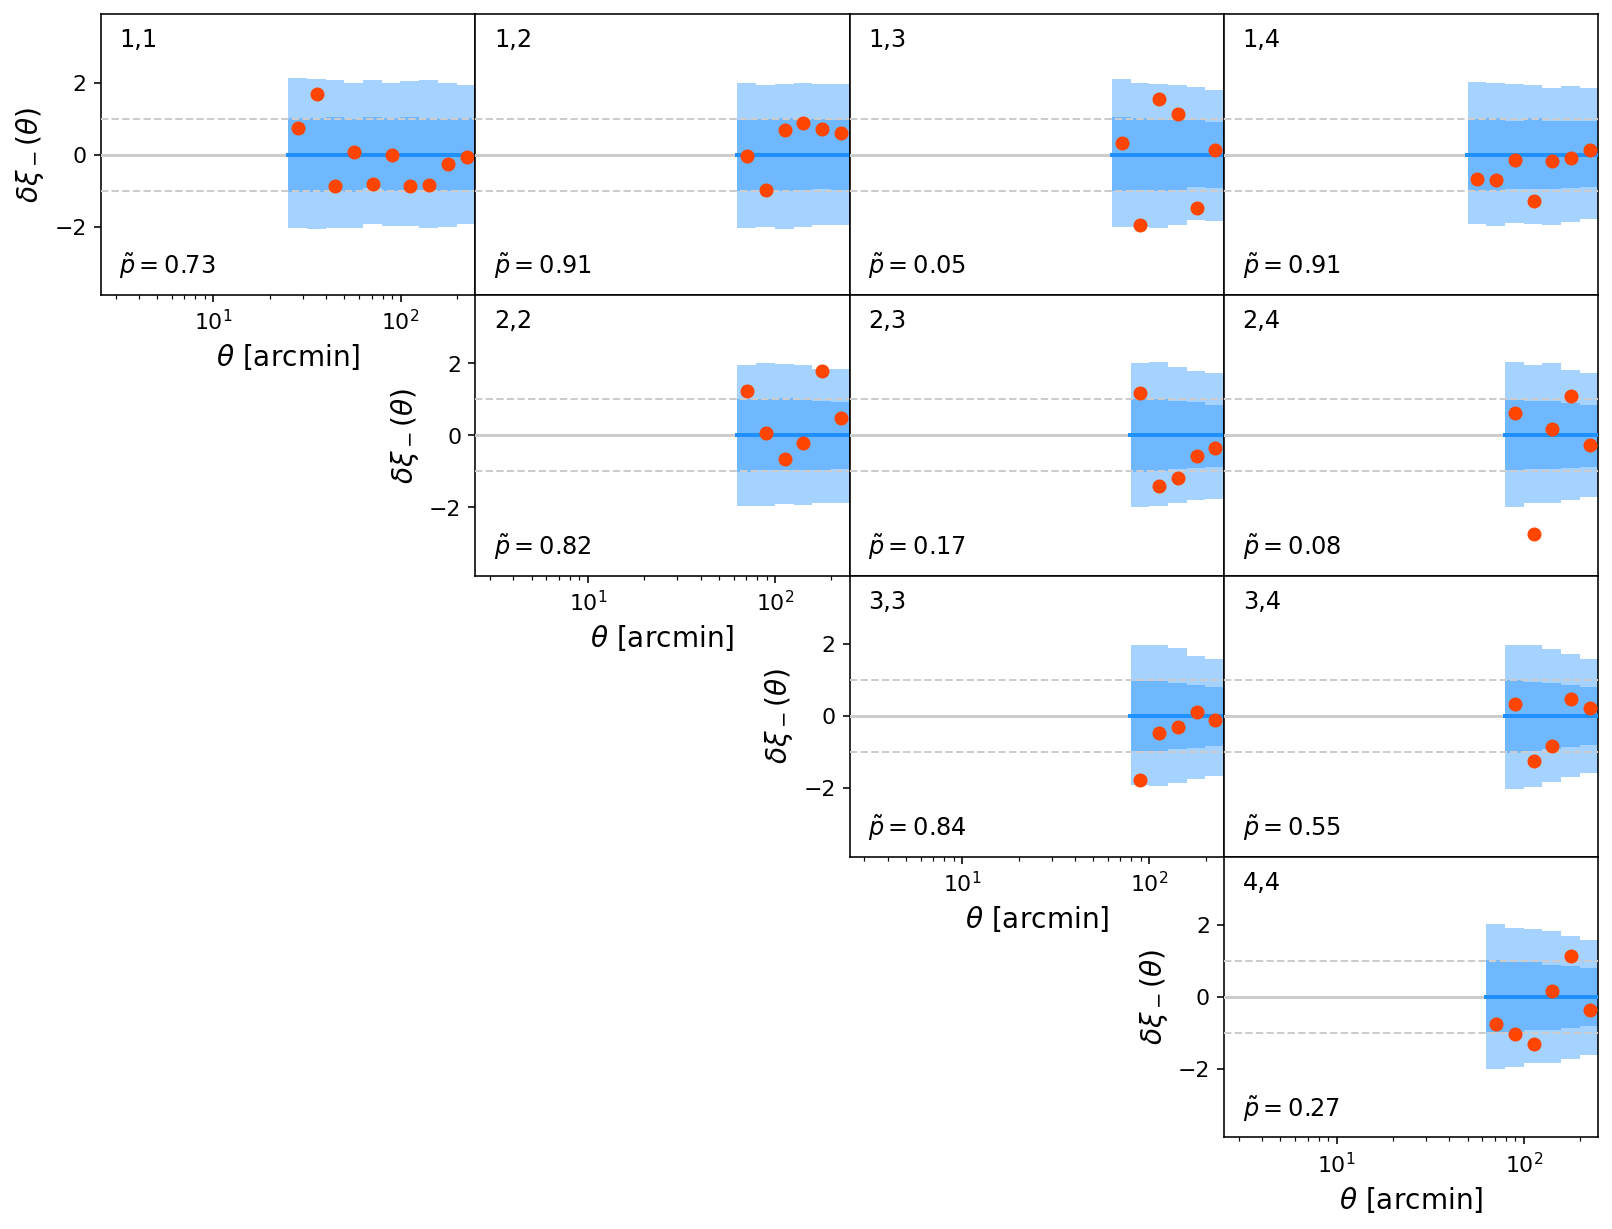

In [52]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


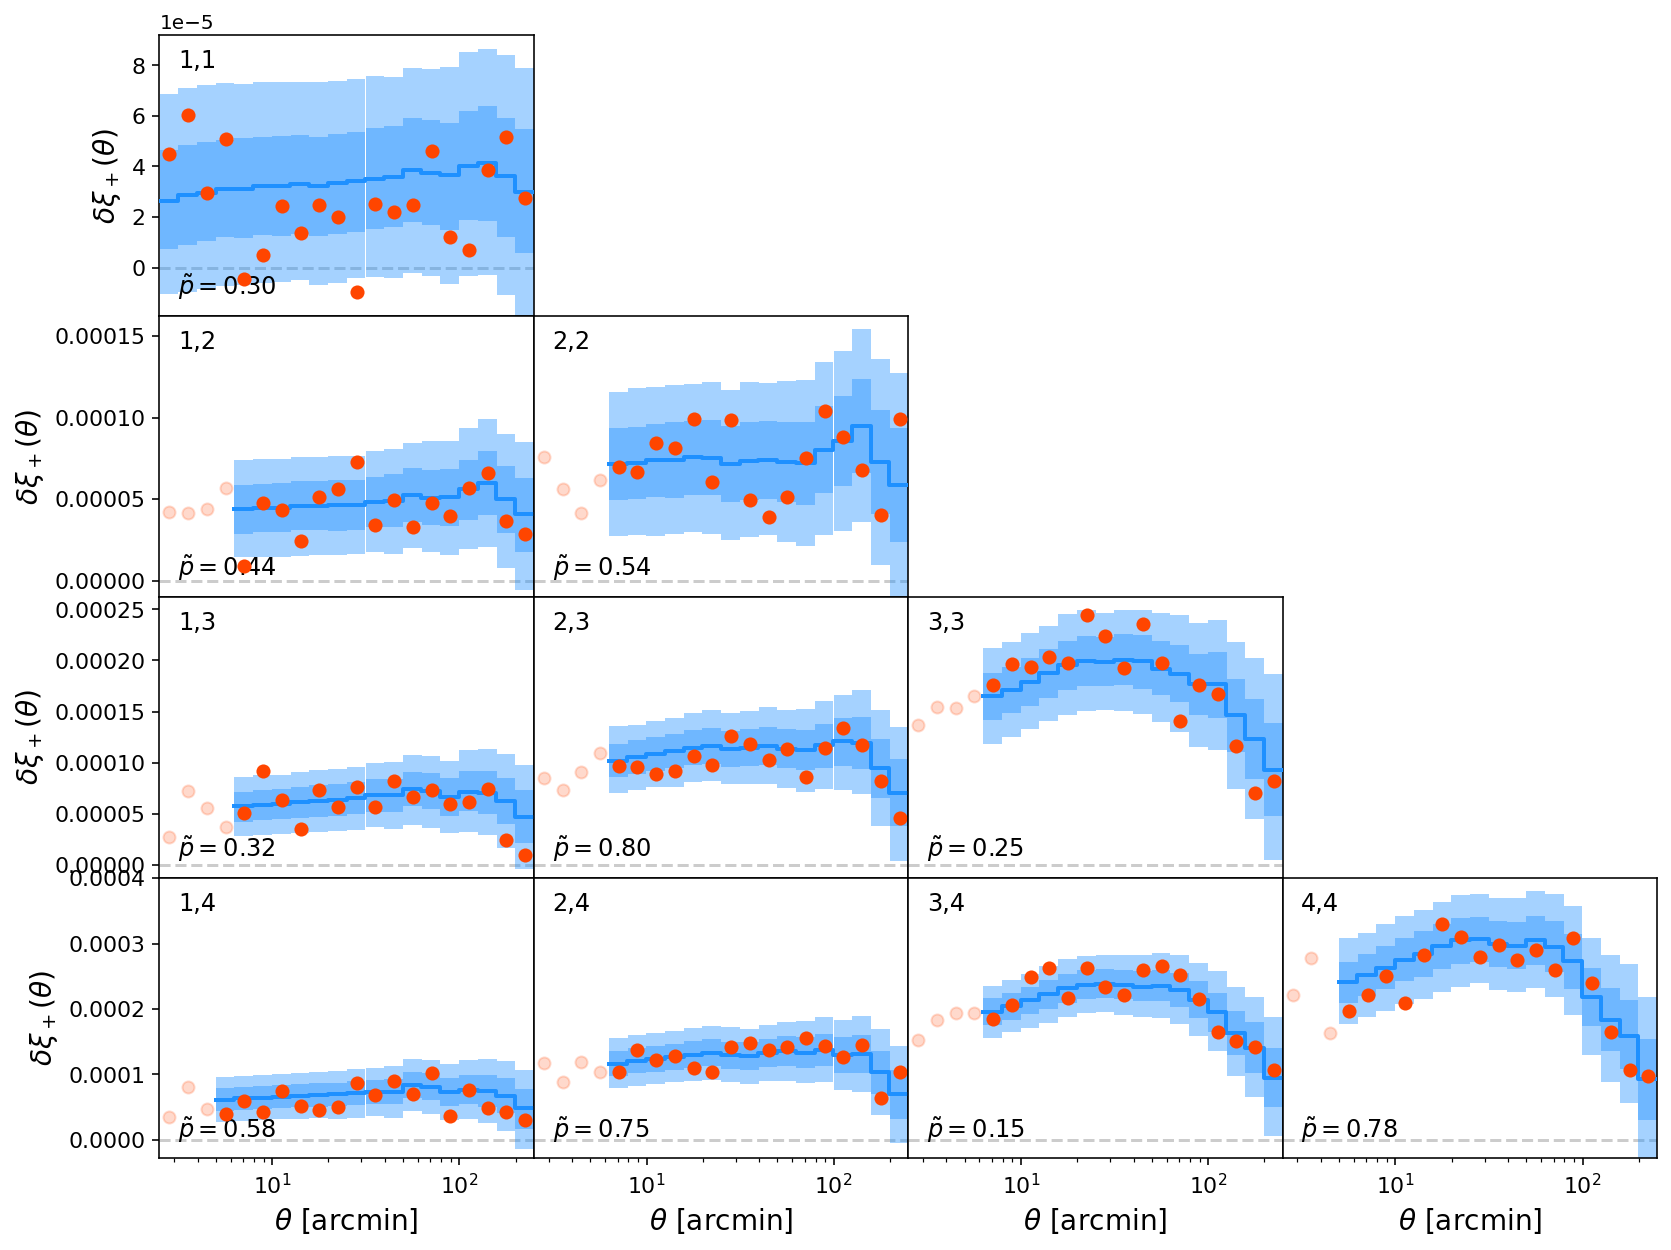

Using DV.fits covariance for chi2


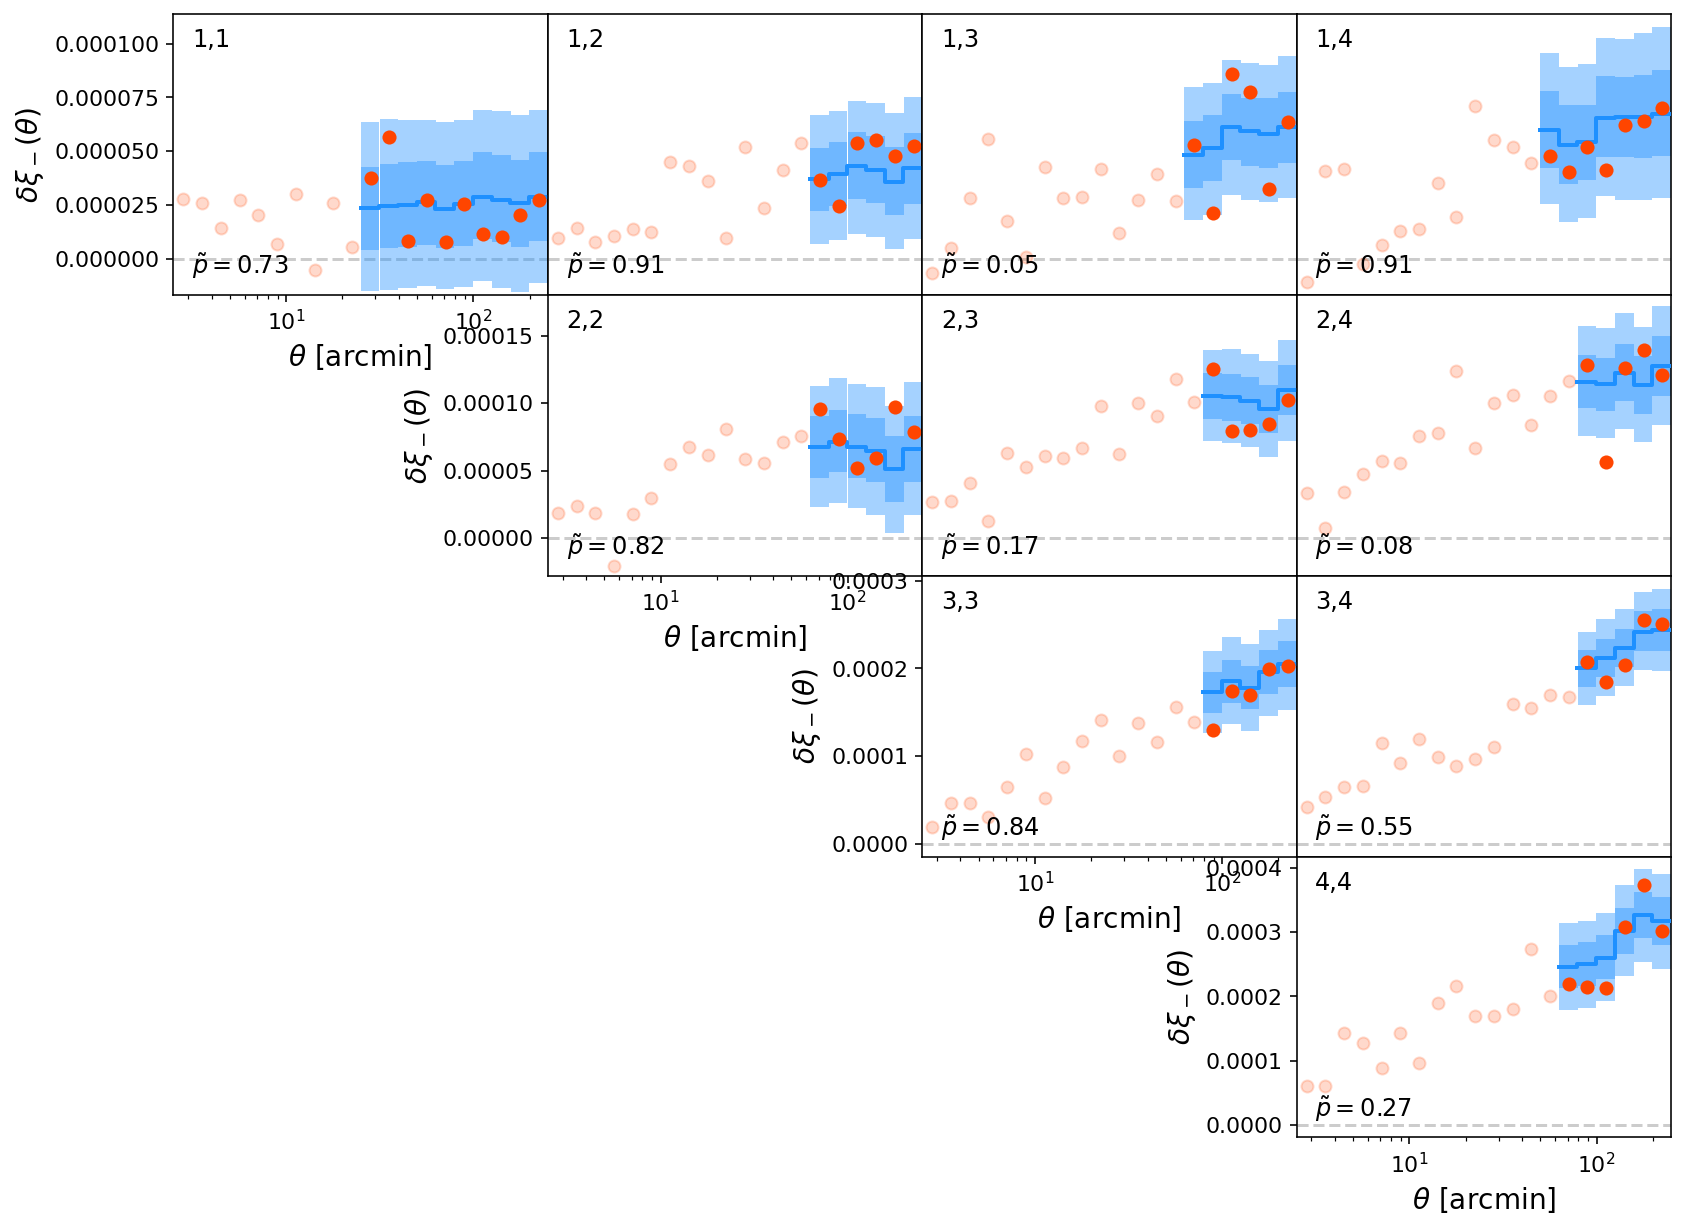

In [53]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# maglim gammat vs shear+wtheta

In [29]:
RUN_NAME = 'cs_wtheta_lcdm_SR_maglim_no56'
RUN_NAME_PPD = 'maglim_gammat_vs_cswtheta'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['gammat']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_wtheta_lcdm_SR_maglim_no56.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bi

In [30]:
# additional_subsets = {'gammat_no56':
# {'full':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_full'] for i in range(4) for j in range(4)]),
#  'sub':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_sub'] for i in range(4) for j in range(4)])},
#                       'gammat_no6':
# {'full':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_full'] for i in range(5) for j in range(4)]),
#  'sub':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_sub'] for i in range(5) for j in range(4)])},
#                      'gammat_no456':
# {'full':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_full'] for i in range(3) for j in range(4)]),
#  'sub':np.concatenate([res[1]['gammat'][i+1,j+1]['idx_sub'] for i in range(3) for j in range(4)])}}


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_wtheta_lcdm_SR_maglim_no56.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6)

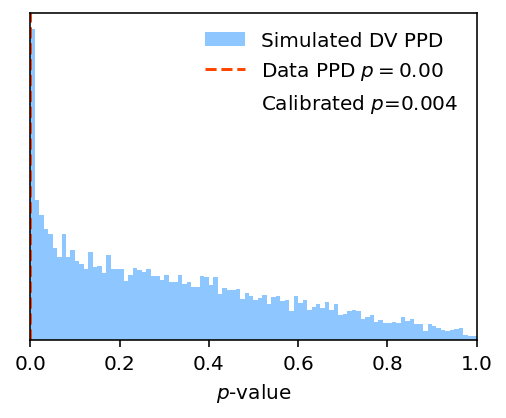

In [15]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'wtheta'],
    data_sets_dprime=['gammat'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit',  # Trying this (different from y1 notebook)
    get_zbin_pair_pcal=False,
#     additional_subsets=additional_subsets
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


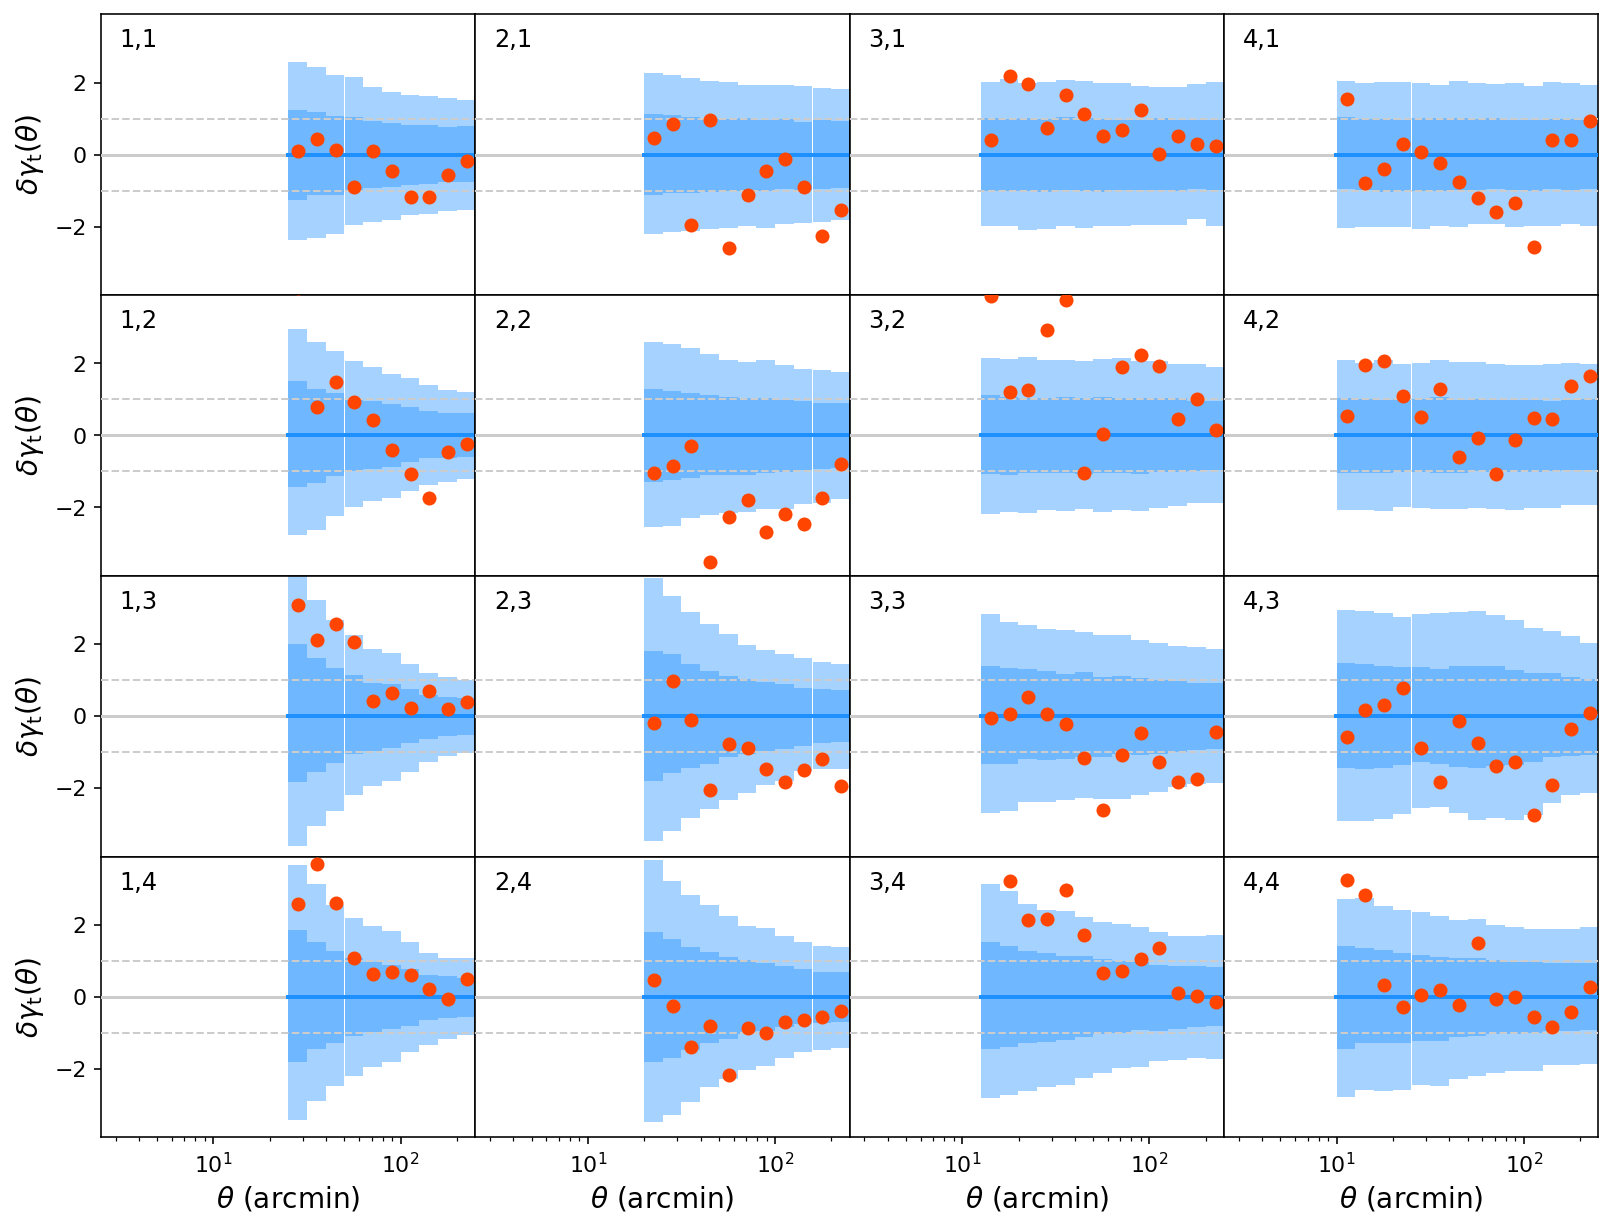

In [18]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


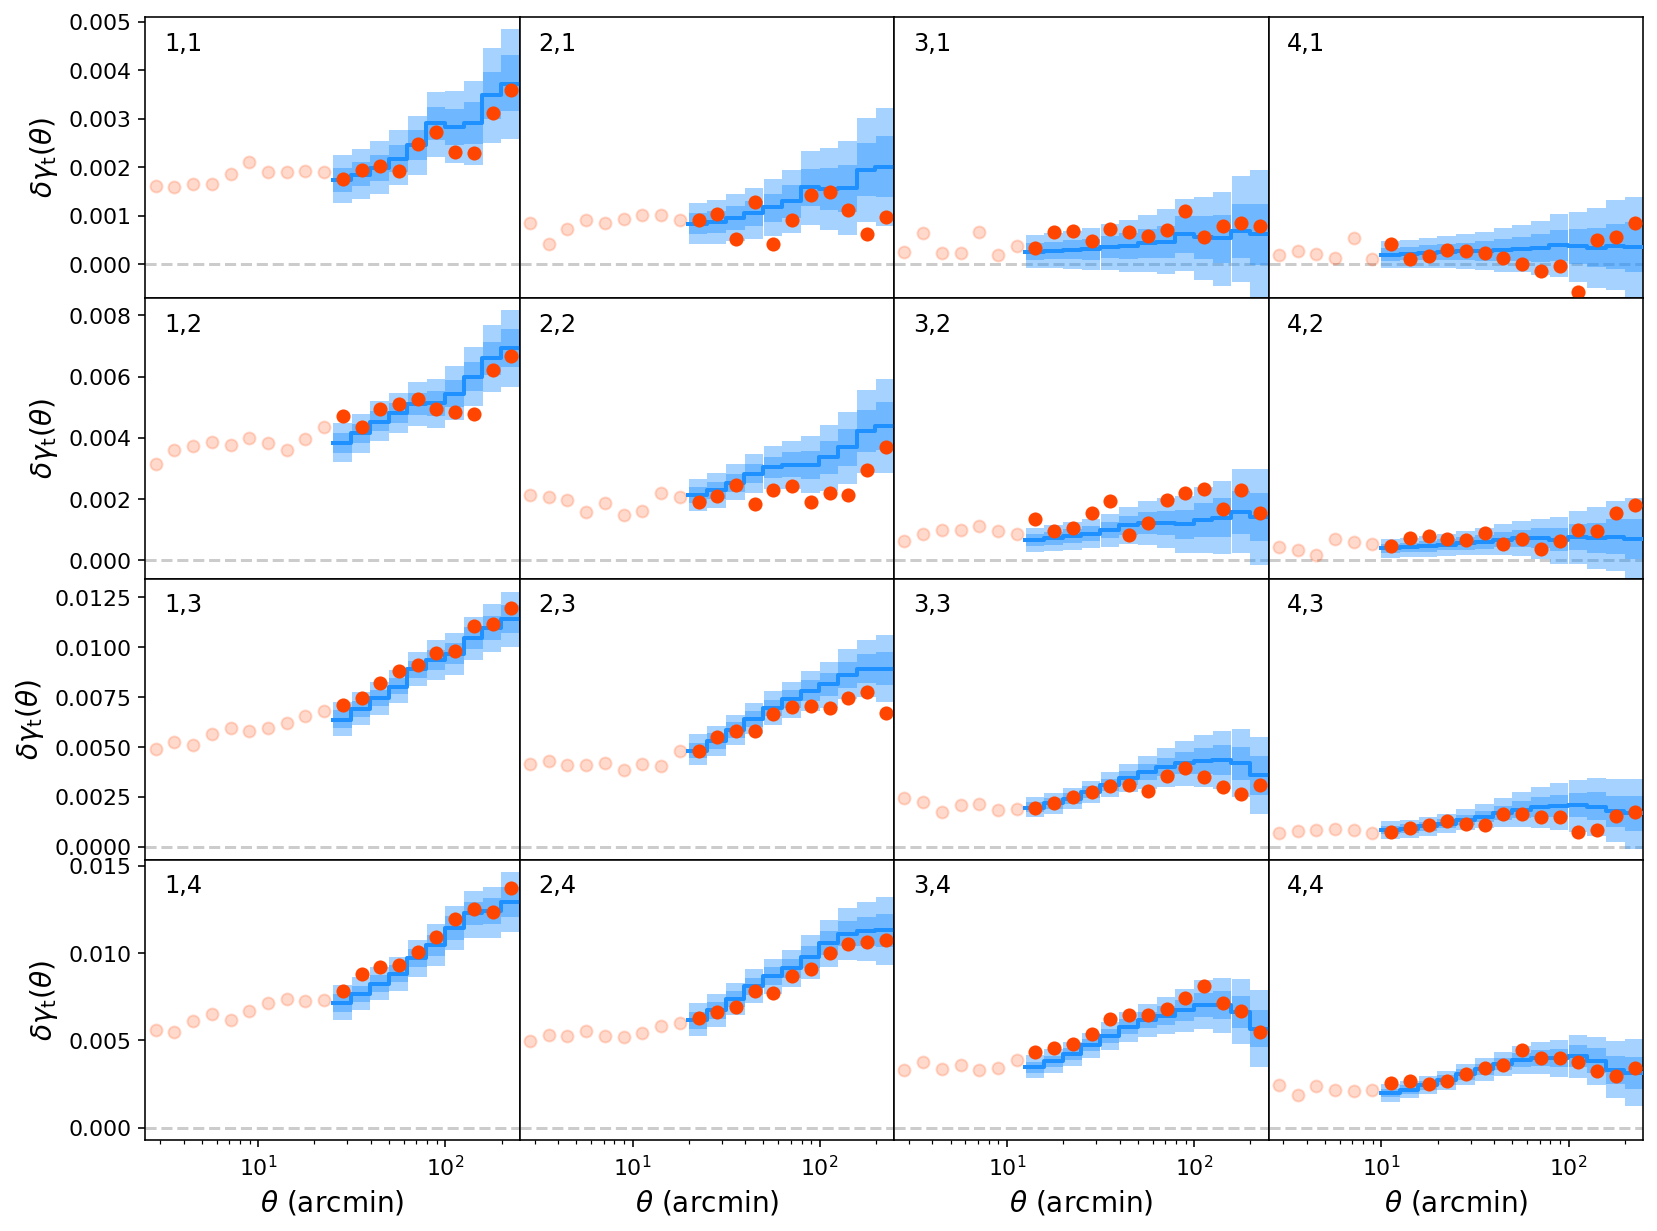

In [19]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# maglim wtheta vs shear+gammat

In [20]:
RUN_NAME = 'cs_gt_lcdm_SR_maglim_no56'
RUN_NAME_PPD = 'maglim_wtheta_vs_csgammat'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_gt_lcdm_SR_maglim_no56.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_l

In [23]:
# additional_subsets = {'wtheta_no56':
# {'full':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_full'] for i in range(4)]),
#  'sub':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_sub'] for i in range(4)])},
#                       'wtheta_no6':
# {'full':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_full'] for i in range(5)]),
#  'sub':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_sub'] for i in range(5)])}}


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_gt_lcdm_SR_maglim_no56.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5

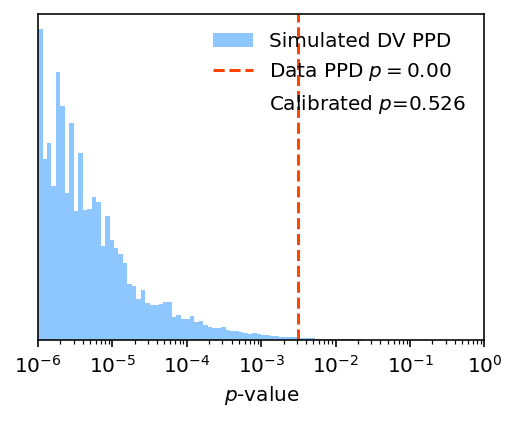

In [26]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'gammat'],
    data_sets_dprime=['wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    use_logit=(1e-6,1),
    sample_from='best-fit',  # Trying this (different from y1 notebook),
    #additional_subsets=additional_subsets
    get_zbin_pair_pcal=False
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


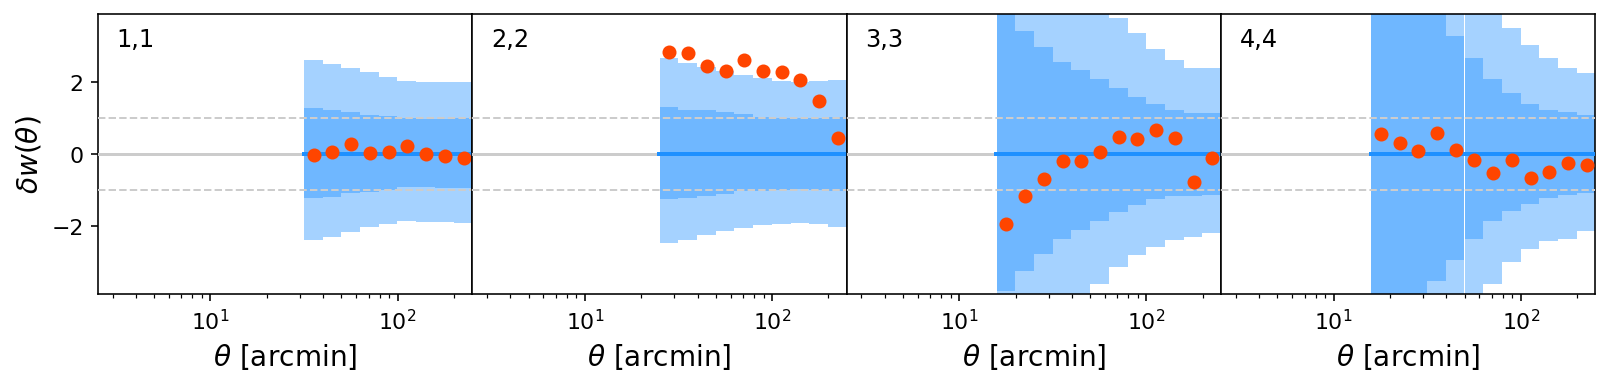

In [27]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


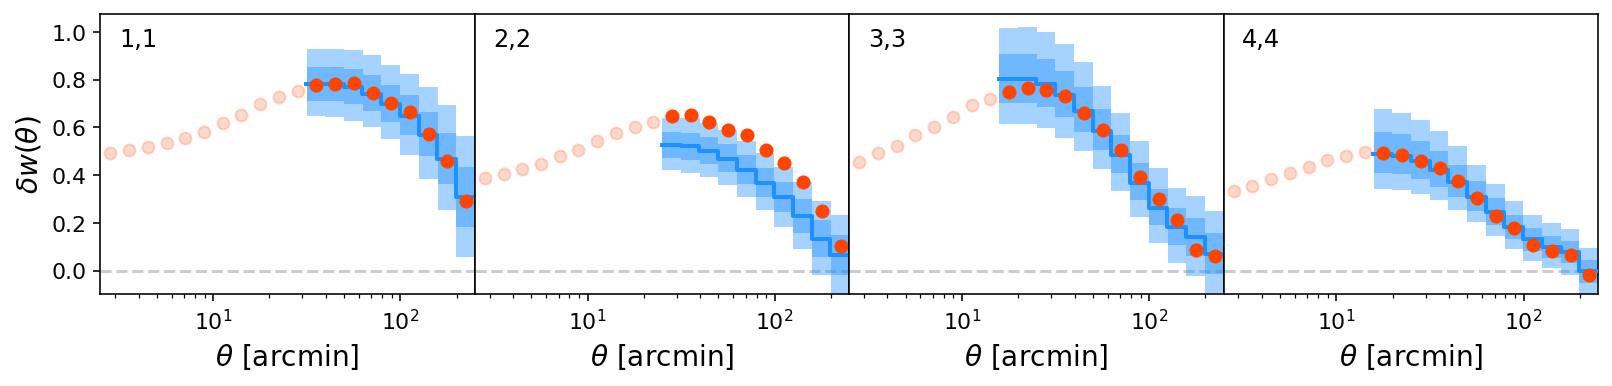

In [28]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

In [ ]:
xi_ss = {i:[] for i in range(6)}
for i in range(6):
    idx = dico_indices['wtheta'][i+1,i+1]['idx_sub']
    for j in range(len(ppd_theory)):
#         xi_ss[i].append((ppd_data_obs[idx] - ppd_theory[j,idx])/(1+ppd_chain['bias_lens--b{}'.format(i+1)][j]**2))
        xi_ss[i].append((ppd_data_obs[idx] - ppd_theory[j,idx])/(1+ppd_theory[j,idx]))
    xi_ss[i] = np.array(xi_ss[i])

In [ ]:
theta_edges = np.geomspace(2.5,250,21)
theta_mid = np.exp(0.5*(np.log(theta_edges[:-1])+np.log(theta_edges[1:])))

In [ ]:
fig, axes = plt.subplots(1,6, sharex=True, sharey=True, figsize=(16,3))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax = axes[i]
    ax.loglog(theta_mid[-xi_ss[i].shape[1]:], med)
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3)
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()
colors = mpl.cm.YlOrRd(np.linspace(0.2,1,6))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax.loglog(theta_mid[-xi_ss[i].shape[1]:], med, c=colors[i], label='bin {}'.format(i+1))
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3, color=colors[i])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()
plt.legend()

In [ ]:
fig, ax = plt.subplots()
colors = mpl.cm.YlOrRd(np.linspace(0.2,1,6))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax.plot(theta_mid[-xi_ss[i].shape[1]:], med, c=colors[i], label='bin {}'.format(i+1))
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3, color=colors[i])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()
plt.legend()

# Plot for webinar

In [6]:
RUN_NAME = '3x2pt_lcdm_SR_maglim'
RUN_NAME_PPD = 'maglim_3x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim', 'gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_3x2pt_lcdm_SR_maglim.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_errors--width_4', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--

In [7]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

# fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 1, 1, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
#          dico_indices,
#          all_data=fits.open(os.path.join(path_dv, DATAFILE)),
#          all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
#          all_realizations=ppd_realizations,
#          all_theory=ppd_theory,
#          weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)


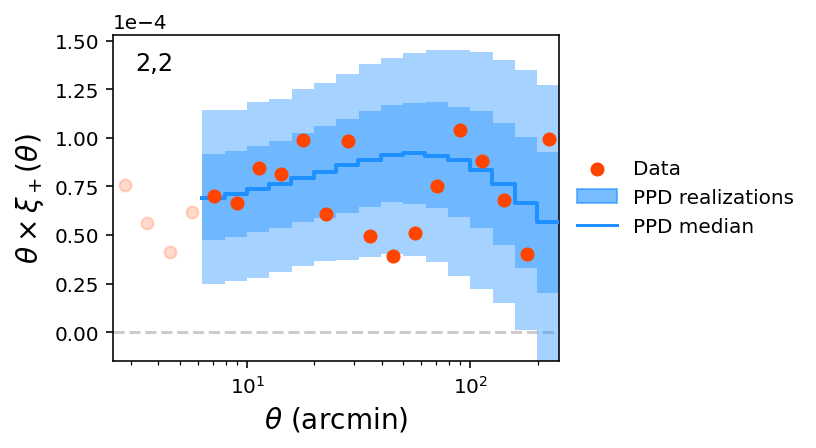

In [60]:
fig = plt.figure(figsize=(4,3))

ppd_plots.ppd_plot(
    plt.gca(),
    'xip',
    2,
    2,
    (2.5, 250.),
    dico_indices,
    fits.open(os.path.join(path_dv, DATAFILE)),
    fits.open(os.path.join(path_dv, DATAFILE)),
    ppd_realizations,
    ppd_theory,
    weights,
    scale_bestfit=False, theta_factor=1)

plt.xlabel(r'$\theta$ (arcmin)', fontsize=14)
plt.ylabel(r'$\theta \times \xi_+(\theta)$', fontsize=14)

plt.gca().ticklabel_format(axis='y', scilimits=(-1,3))

plt.scatter(0,0, color='orangered', label='Data')
plt.fill_between([0,0], [0,0], color='dodgerblue', label='PPD realizations', alpha=0.6)
plt.plot([0,0], [0,0], color='dodgerblue', label='PPD median')

h, l = plt.gca().get_legend_handles_labels()
idx = [1,2,0]
plt.legend([h[i] for i in idx], [l[i] for i in idx], bbox_to_anchor=(1.,0.5), loc='center left', frameon=False)

In [56]:
l

['PPD median', 'Data', 'PPD realizations']

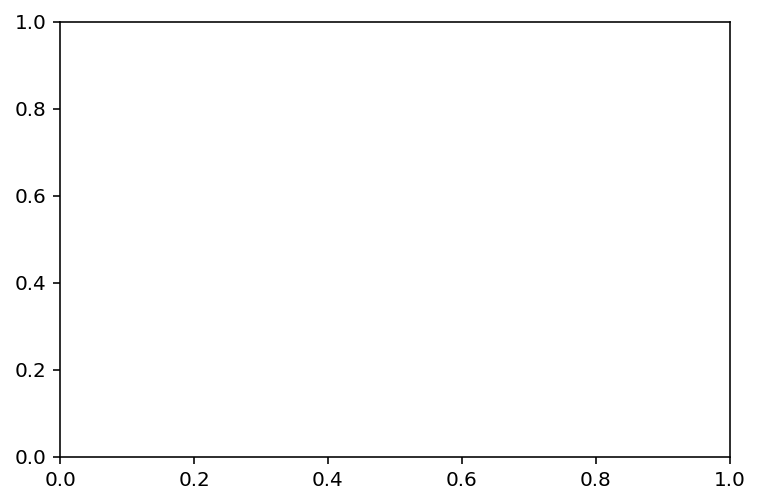

In [51]:
ax = plt.gca()

In [ ]:
ax.get_legend_handles_labels

In [ ]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'gammat','wtheta'],
    data_sets_dprime=['xip','xim', 'gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))